In [1]:
import pandas as pd
data = pd.read_excel('DataPenelitian_RMSSD_pNN50_Usia.xlsx', sheet_name='Sheet1use')
data.head()

,sumber_database,file,rmssd,pnni_50,usia
0,NSR2DB,nsr011,15.177757,0.789517,65.0
1,NSR2DB,nsr026,16.621134,0.949012,72.0
2,NSR2DB,nsr006,17.614672,1.282040,64.0
3,NSR2DB,nsr013,19.228316,1.737907,63.0
4,NSR2DB,nsr029,20.249970,1.458022,63.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sumber_database  158 non-null    object 
 1   file             158 non-null    object 
 2   rmssd            158 non-null    float64
 3   pnni_50          158 non-null    float64
 4   usia             158 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.3+ KB


In [3]:
# Select the columns of interest, excluding the dependent variable
selected_columns = ['rmssd','pnni_50','usia']

# Create the feature matrix X (excluding the constant term)
X = data[selected_columns]
X

,rmssd,pnni_50,usia
0,15.177757,0.789517,65.00
1,16.621134,0.949012,72.00
2,17.614672,1.282040,64.00
3,19.228316,1.737907,63.00
4,20.249970,1.458022,63.00
...,...,...,...
153,102.469895,53.135276,28.00
154,107.966084,8.190888,0.42
155,116.678092,47.322612,11.00
156,119.210450,41.685195,26.00


In [4]:
# Select the columns of interest, excluding the dependent variable
selected_columns = ['rmssd', 'pnni_50','usia']

# Create the feature matrix X (excluding the constant term)
X1 = data[selected_columns]
X1

,rmssd,pnni_50,usia
0,15.177757,0.789517,65.00
1,16.621134,0.949012,72.00
2,17.614672,1.282040,64.00
3,19.228316,1.737907,63.00
4,20.249970,1.458022,63.00
...,...,...,...
153,102.469895,53.135276,28.00
154,107.966084,8.190888,0.42
155,116.678092,47.322612,11.00
156,119.210450,41.685195,26.00


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import pairwise_distances

# Hierarchical Clustering

In [6]:
Z4 = linkage(X, method='ward', metric='euclidean')

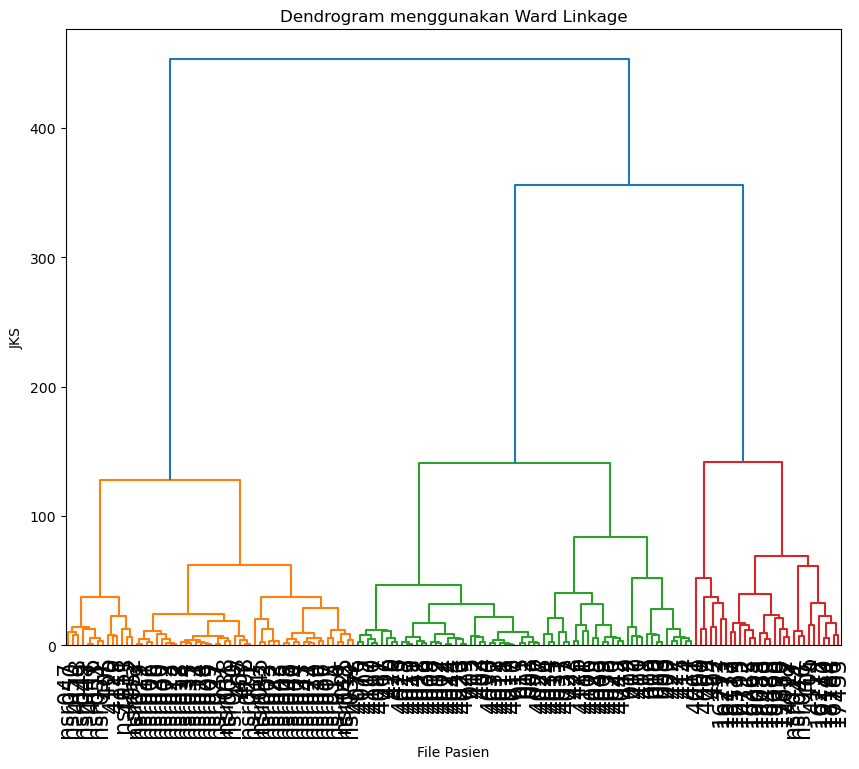

In [21]:
labelList = list(data['file'])

plt.figure(figsize=(10, 8))
dendrogram(
    Z4,
    orientation='top',
    labels=labelList,
    distance_sort='ascending',
    show_leaf_counts=False,
    leaf_font_size=16
)

# Menambahkan label sumbu dan judul
plt.xlabel("File Pasien")
plt.ylabel("JKS")
plt.title("Dendrogram menggunakan Ward Linkage")

plt.show()

In [7]:
X['Hierarchical_Clusters'] = fcluster(Z4, 3, criterion='maxclust')
X

C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_30668\2505631384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Hierarchical_Clusters'] = fcluster(Z4, 3, criterion='maxclust')


,rmssd,pnni_50,usia,Hierarchical_Clusters
0,15.177757,0.789517,65.00,1
1,16.621134,0.949012,72.00,1
2,17.614672,1.282040,64.00,1
3,19.228316,1.737907,63.00,1
4,20.249970,1.458022,63.00,1
...,...,...,...,...
153,102.469895,53.135276,28.00,3
154,107.966084,8.190888,0.42,3
155,116.678092,47.322612,11.00,3
156,119.210450,41.685195,26.00,3


In [7]:
import time
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster

# Catat waktu awal
start_time = time.time()

# Eksekusi hierarchical clustering
X['Hierarchical_Clusters'] = fcluster(Z4, 3, criterion='maxclust')

# Catat waktu akhir
end_time = time.time()
""
# Hitung durasi waktu
duration = end_time - start_time

# Tampilkan durasi waktu
print(f"Durasi waktu eksekusi: {duration} detik")

# Tampilkan hasil clustering
print(X)

Durasi waktu eksekusi: 0.016957998275756836 detik
          rmssd    pnni_50   usia  Hierarchical_Clusters
0     15.177757   0.789517  65.00                      1
1     16.621134   0.949012  72.00                      1
2     17.614672   1.282040  64.00                      1
3     19.228316   1.737907  63.00                      1
4     20.249970   1.458022  63.00                      1
..          ...        ...    ...                    ...
153  102.469895  53.135276  28.00                      3
154  107.966084   8.190888   0.42                      3
155  116.678092  47.322612  11.00                      3
156  119.210450  41.685195  26.00                      3
157  120.984531  38.233447   0.83                      3

[158 rows x 4 columns]


C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_12408\3544268049.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Hierarchical_Clusters'] = fcluster(Z4, 3, criterion='maxclust')


# K-Means Clustering

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

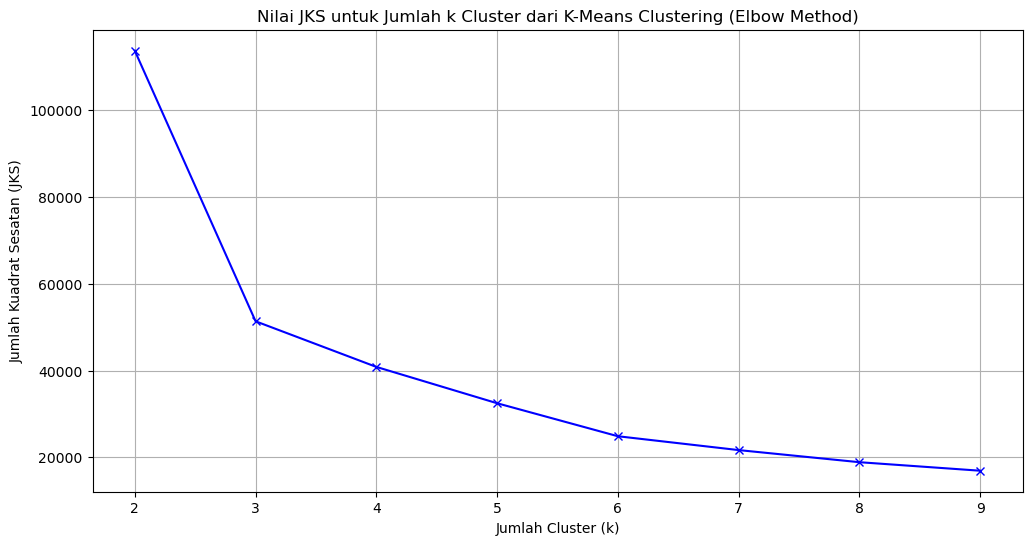

In [30]:
k_values = range(2, 10)  
sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    sse.append(kmeans.inertia_)

# Membuat plot dari metode elbow
plt.figure(figsize=(12, 6))
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Jumlah Kuadrat Sesatan (JKS)')
plt.title('Nilai JKS untuk Jumlah k Cluster dari K-Means Clustering (Elbow Method)')
plt.grid(True)
plt.show()

In [31]:
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, tol=0, random_state=42)

In [33]:
# Menyimpan hasil K-Means clustering dalam data X
X['KMeans_Cluster'] = kmeans.fit_predict(X1)
X

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,rmssd,pnni_50,usia,Hierarchical_Clusters,KMeans_Cluster
0,15.177757,0.789517,65.00,1,0
1,16.621134,0.949012,72.00,1,0
2,17.614672,1.282040,64.00,1,0
3,19.228316,1.737907,63.00,1,0
4,20.249970,1.458022,63.00,1,0
...,...,...,...,...,...
153,102.469895,53.135276,28.00,3,1
154,107.966084,8.190888,0.42,3,1
155,116.678092,47.322612,11.00,3,1
156,119.210450,41.685195,26.00,3,1


In [39]:
# Mengganti nilai 3 dengan 2 dan nilai 2 dengan 3
X['KMeans_Cluster'] = X['KMeans_Cluster'].replace({0:1, 1: 2, 2:3})

# Menampilkan DataFrame setelah perubahan
X

,rmssd,pnni_50,usia,Hierarchical_Clusters,KMeans_Cluster,GMM_Clusters_Random
0,15.177757,0.789517,65.00,1,1,1
1,16.621134,0.949012,72.00,1,1,1
2,17.614672,1.282040,64.00,1,1,1
3,19.228316,1.737907,63.00,1,1,1
4,20.249970,1.458022,63.00,1,1,1
...,...,...,...,...,...,...
153,102.469895,53.135276,28.00,3,2,3
154,107.966084,8.190888,0.42,3,2,3
155,116.678092,47.322612,11.00,3,2,3
156,119.210450,41.685195,26.00,3,2,3


In [40]:
# Mendapatkan pusat cluster dari hasil K-Means clustering
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[31.2953552 ,  7.17632616, 60.18644068],
       [83.63354237, 32.44634607, 28.23946875],
       [40.39017953,  7.841224  ,  5.72770149]])

# GMM Clustering dengan Inisialisasi Acak

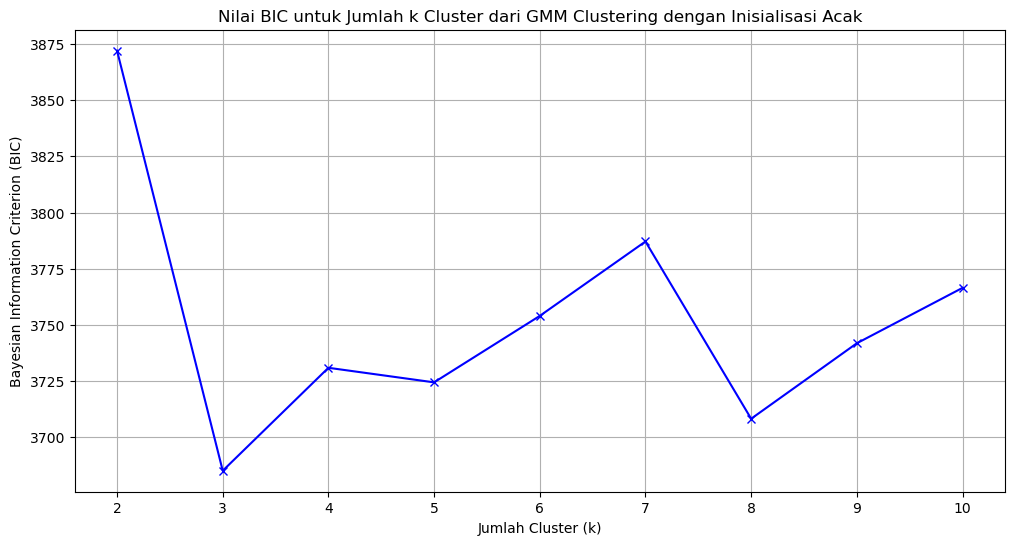

In [42]:
k_values = range(2, 11) 
bic_scores = []
for k in k_values:
    gmm = GaussianMixture(n_components=k, covariance_type='full', init_params='random', random_state=42)
    gmm.fit(X1)

    # Mendapatkan nilai BIC
    bic_scores.append(gmm.bic(X1))

# Membuat plot dari BIC
plt.figure(figsize=(12, 6))
plt.plot(k_values, bic_scores, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Bayesian Information Criterion (BIC)')
plt.title('Nilai BIC untuk Jumlah k Cluster dari GMM Clustering dengan Inisialisasi Acak')
plt.grid(True)
plt.show()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.mixture import GaussianMixture
import time

# Membuat model GMM dengan covariance type 'tied'
gmm_acak = GaussianMixture(n_components=3, covariance_type='full', tol=0.0001, init_params='random', random_state=42)

# Catat waktu awal
start_time = time.time()

gmm_acak.fit(X1)  # Lakukan proses fitting

# Catat waktu akhir
end_time = time.time()

# Mendapatkan label kluster untuk setiap data point
cluster_labels = gmm_acak.predict(X1)

# Hitung lama waktu konvergensi
convergence_time = end_time - start_time

print(f"Waktu konvergensi: {convergence_time} detik")

Waktu konvergensi: 0.13707518577575684 detik


In [46]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

# Membuat model GMM dengan covariance type 'full'
gmm_acak = GaussianMixture(n_components=3, covariance_type='full', tol=0.0001, init_params='random', random_state=42)

gmm_acak.fit(X1)  # Lakukan proses fitting

# Mendapatkan label kluster untuk setiap data point
cluster_labels = gmm_acak.predict(X1)

# Mendapatkan jumlah iterasi
num_iterations = gmm_acak.n_iter_

print(f"Jumlah iterasi: {num_iterations}")

Jumlah iterasi: 22


In [58]:
X['GMM_Clusters_Random'] = cluster_labels
X

,rmssd,pnni_50,usia,Hierarchical_Clusters,KMeans_Cluster,GMM_Clusters_Random
0,15.177757,0.789517,65.00,1,1,0
1,16.621134,0.949012,72.00,1,1,0
2,17.614672,1.282040,64.00,1,1,0
3,19.228316,1.737907,63.00,1,1,0
4,20.249970,1.458022,63.00,1,1,0
...,...,...,...,...,...,...
153,102.469895,53.135276,28.00,3,2,2
154,107.966084,8.190888,0.42,3,2,2
155,116.678092,47.322612,11.00,3,2,2
156,119.210450,41.685195,26.00,3,2,2


In [59]:
# Mengganti nilai 3 dengan 2 dan nilai 2 dengan 3
X['GMM_Clusters_Random'] = X['GMM_Clusters_Random'].replace({0:1, 1: 2, 2:3})

# Menampilkan DataFrame setelah perubahan
X

,rmssd,pnni_50,usia,Hierarchical_Clusters,KMeans_Cluster,GMM_Clusters_Random
0,15.177757,0.789517,65.00,1,1,1
1,16.621134,0.949012,72.00,1,1,1
2,17.614672,1.282040,64.00,1,1,1
3,19.228316,1.737907,63.00,1,1,1
4,20.249970,1.458022,63.00,1,1,1
...,...,...,...,...,...,...
153,102.469895,53.135276,28.00,3,2,3
154,107.966084,8.190888,0.42,3,2,3
155,116.678092,47.322612,11.00,3,2,3
156,119.210450,41.685195,26.00,3,2,3


C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_11804\697166597.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_data[feature_name], hist=False, kde=True, label=f'Cluster {cluster_num}')
C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_11804\697166597.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

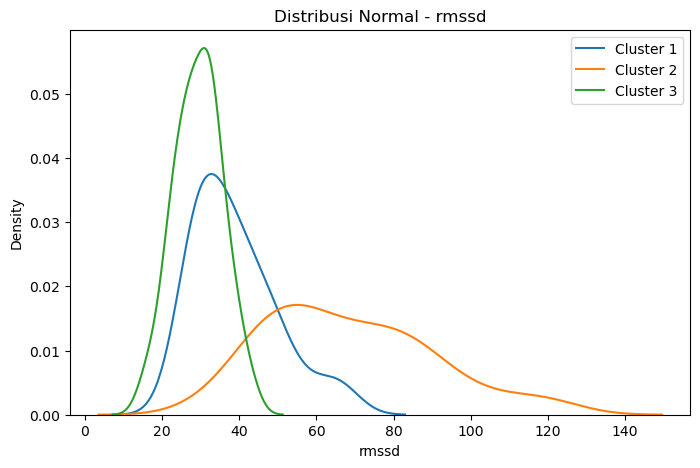

C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_11804\697166597.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_data[feature_name], hist=False, kde=True, label=f'Cluster {cluster_num}')
C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_11804\697166597.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

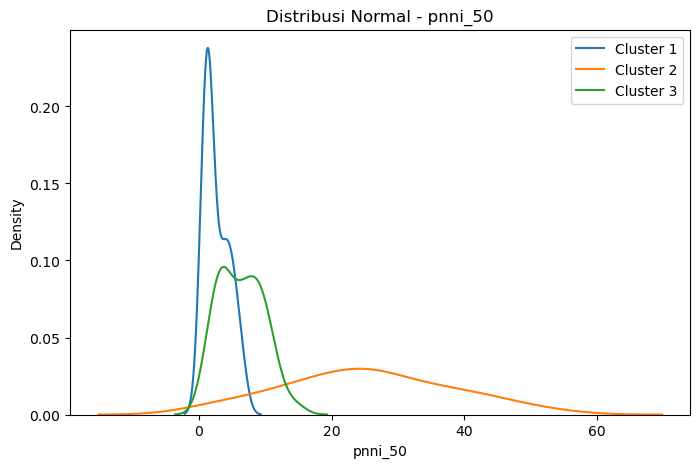

C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_11804\697166597.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_data[feature_name], hist=False, kde=True, label=f'Cluster {cluster_num}')
C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_11804\697166597.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

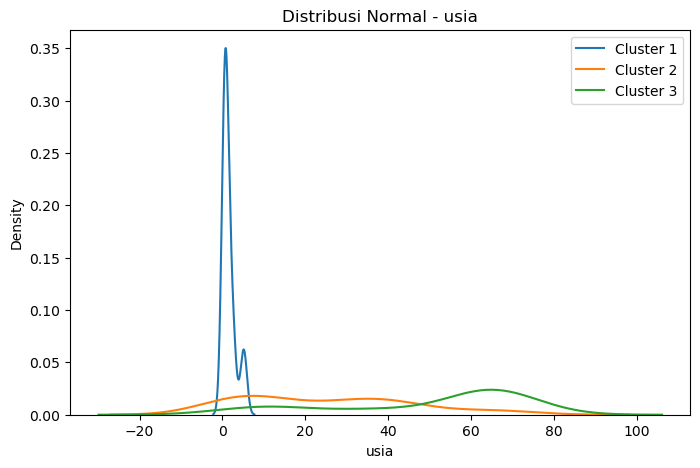

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat plot distribusi normal untuk masing-masing kluster dan variabel
for feature_name in ['rmssd', 'pnni_50', 'usia']:
    plt.figure(figsize=(8, 5))
    
    for cluster_num in range(1, 4):
        cluster_data = X[X['GMM_Clusters_Random'] == cluster_num]
        sns.distplot(cluster_data[feature_name], hist=False, kde=True, label=f'Cluster {cluster_num}')
    
    plt.title(f'Distribusi Normal - {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [16]:
from scipy.stats import anderson

for cluster_num in range(1, 4):
    for feature in ['rmssd', 'pnni_50', 'usia']:
        data_cluster = X[X['GMM_Clusters_Random'] == cluster_num][feature]
        
        # Uji normalitas dengan Anderson-Darling
        result = anderson(data_cluster)
        
        # Menampilkan nilai kritis untuk tingkat signifikansi 5%
        critical_value_5percent = result.critical_values[2]
        print(f'Cluster {cluster_num}, {feature}:')
        print(f'Critical Value at 5% significance level: {critical_value_5percent}')
        
        if result.statistic > critical_value_5percent:
            print(f'Data mungkin mengikuti distribusi normal (statistic = {result.statistic:.4f})')
        else:
            print(f'Data tidak mengikuti distribusi normal (statistic = {result.statistic:.4f})')

Cluster 1, rmssd:
Critical Value at 5% significance level: 0.717
Data mungkin mengikuti distribusi normal (statistic = 0.8970)
Cluster 1, pnni_50:
Critical Value at 5% significance level: 0.717
Data mungkin mengikuti distribusi normal (statistic = 1.6386)
Cluster 1, usia:
Critical Value at 5% significance level: 0.717
Data mungkin mengikuti distribusi normal (statistic = 3.1349)
Cluster 2, rmssd:
Critical Value at 5% significance level: 0.741
Data tidak mengikuti distribusi normal (statistic = 0.6819)
Cluster 2, pnni_50:
Critical Value at 5% significance level: 0.741
Data tidak mengikuti distribusi normal (statistic = 0.1495)
Cluster 2, usia:
Critical Value at 5% significance level: 0.741
Data mungkin mengikuti distribusi normal (statistic = 1.3245)
Cluster 3, rmssd:
Critical Value at 5% significance level: 0.747
Data tidak mengikuti distribusi normal (statistic = 0.1424)
Cluster 3, pnni_50:
Critical Value at 5% significance level: 0.747
Data tidak mengikuti distribusi normal (statisti

# GMM Clustering dengan Inisialisasi K-Means

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.mixture import GaussianMixture
import time

# Membuat model GMM dengan covariance type 'tied'
gmm_kmeans = GaussianMixture(n_components=3, covariance_type='full', tol=0.0001, init_params='kmeans', random_state=42)

# Catat waktu awal
start_time = time.time()

gmm_kmeans.fit(X1)  # Lakukan proses fitting

# Catat waktu akhir
end_time = time.time()

# Mendapatkan label kluster untuk setiap data point
cluster_labels2 = gmm_kmeans.predict(X1)

# Hitung lama waktu konvergensi
convergence_time = end_time - start_time

print(f"Waktu konvergensi: {convergence_time} detik")

Waktu konvergensi: 0.008820772171020508 detik


In [56]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

# Membuat model GMM dengan covariance type 'full'
gmm_acak = GaussianMixture(n_components=3, covariance_type='full', tol=0.0001, init_params='kmeans', random_state=42)

gmm_acak.fit(X1)  # Lakukan proses fitting

# Mendapatkan label kluster untuk setiap data point
cluster_labels = gmm_acak.predict(X1)

# Mendapatkan jumlah iterasi
num_iterations = gmm_acak.n_iter_

print(f"Jumlah iterasi: {num_iterations}")

Jumlah iterasi: 8


C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [71]:
X['GMM_Clusters_KMeans'] = cluster_labels2
X

,rmssd,pnni_50,usia,Hierarchical_Clusters,KMeans_Cluster,GMM_Clusters_Random,GMM_Clusters_KMeans
0,15.177757,0.789517,65.00,1,1,1,0
1,16.621134,0.949012,72.00,1,1,1,0
2,17.614672,1.282040,64.00,1,1,1,0
3,19.228316,1.737907,63.00,1,1,1,0
4,20.249970,1.458022,63.00,1,1,1,0
...,...,...,...,...,...,...,...
153,102.469895,53.135276,28.00,3,2,3,1
154,107.966084,8.190888,0.42,3,2,3,1
155,116.678092,47.322612,11.00,3,2,3,1
156,119.210450,41.685195,26.00,3,2,3,1


In [72]:
# Mengganti nilai 3 dengan 2 dan nilai 2 dengan 3
X['GMM_Clusters_KMeans'] = X['GMM_Clusters_KMeans'].replace({0:1, 1: 2, 2:3})

# Menampilkan DataFrame setelah perubahan
X

,rmssd,pnni_50,usia,Hierarchical_Clusters,KMeans_Cluster,GMM_Clusters_Random,GMM_Clusters_KMeans
0,15.177757,0.789517,65.00,1,1,1,1
1,16.621134,0.949012,72.00,1,1,1,1
2,17.614672,1.282040,64.00,1,1,1,1
3,19.228316,1.737907,63.00,1,1,1,1
4,20.249970,1.458022,63.00,1,1,1,1
...,...,...,...,...,...,...,...
153,102.469895,53.135276,28.00,3,2,3,2
154,107.966084,8.190888,0.42,3,2,3,2
155,116.678092,47.322612,11.00,3,2,3,2
156,119.210450,41.685195,26.00,3,2,3,2


C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_11804\4022951546.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_data[feature_name], hist=False, kde=True, label=f'Cluster {cluster_num}')
C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_11804\4022951546.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

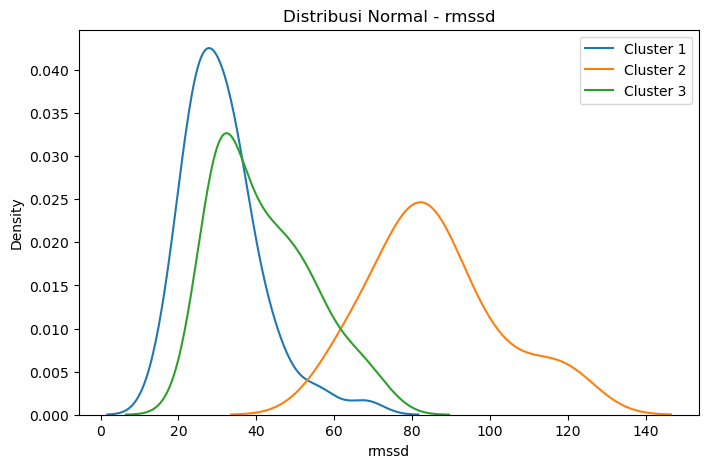

C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_11804\4022951546.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_data[feature_name], hist=False, kde=True, label=f'Cluster {cluster_num}')
C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_11804\4022951546.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

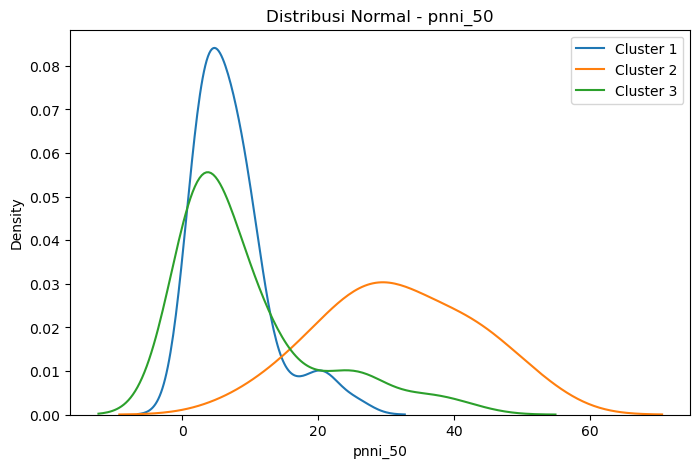

C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_11804\4022951546.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_data[feature_name], hist=False, kde=True, label=f'Cluster {cluster_num}')
C:\Users\BALITTANAH\AppData\Local\Temp\ipykernel_11804\4022951546.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

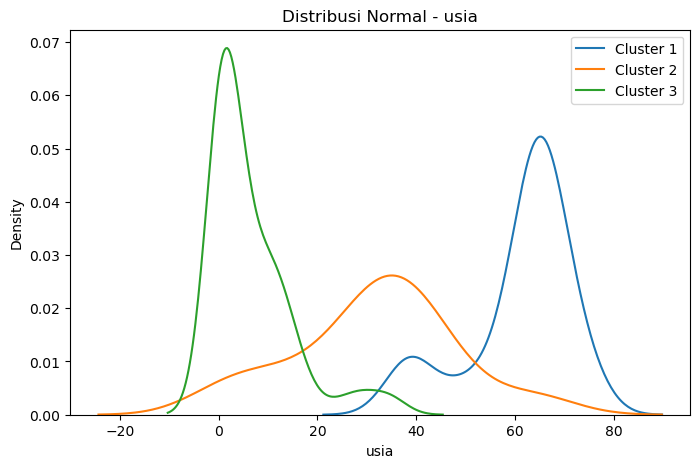

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat plot distribusi normal untuk masing-masing kluster dan variabel
for feature_name in ['rmssd', 'pnni_50', 'usia']:
    plt.figure(figsize=(8, 5))
    
    for cluster_num in range(1, 4):
        cluster_data = X[X['GMM_Clusters_KMeans'] == cluster_num]
        sns.distplot(cluster_data[feature_name], hist=False, kde=True, label=f'Cluster {cluster_num}')
    
    plt.title(f'Distribusi Normal - {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [11]:
from scipy.stats import anderson

for cluster_num in range(1, 4):
    for feature in ['rmssd', 'pnni_50', 'usia']:
        data_cluster = X[X['GMM_Clusters_KMeans'] == cluster_num][feature]
        
        # Uji normalitas dengan Anderson-Darling
        result = anderson(data_cluster)
        
        # Menampilkan nilai kritis untuk tingkat signifikansi 5%
        critical_value_5percent = result.critical_values[2]
        print(f'Cluster {cluster_num}, {feature}:')
        print(f'Critical Value at 5% significance level: {critical_value_5percent}')
        
        if result.statistic > critical_value_5percent:
            print(f'Data mungkin mengikuti distribusi normal (statistic = {result.statistic:.4f})')
        else:
            print(f'Data tidak mengikuti distribusi normal (statistic = {result.statistic:.4f})')

Cluster 1, rmssd:
Critical Value at 5% significance level: 0.741
Data mungkin mengikuti distribusi normal (statistic = 1.1155)
Cluster 1, pnni_50:
Critical Value at 5% significance level: 0.741
Data mungkin mengikuti distribusi normal (statistic = 2.1460)
Cluster 1, usia:
Critical Value at 5% significance level: 0.741
Data mungkin mengikuti distribusi normal (statistic = 3.7514)
Cluster 2, rmssd:
Critical Value at 5% significance level: 0.708
Data tidak mengikuti distribusi normal (statistic = 0.4707)
Cluster 2, pnni_50:
Critical Value at 5% significance level: 0.708
Data tidak mengikuti distribusi normal (statistic = 0.1224)
Cluster 2, usia:
Critical Value at 5% significance level: 0.708
Data tidak mengikuti distribusi normal (statistic = 0.4658)
Cluster 3, rmssd:
Critical Value at 5% significance level: 0.749
Data mungkin mengikuti distribusi normal (statistic = 1.5875)
Cluster 3, pnni_50:
Critical Value at 5% significance level: 0.749
Data mungkin mengikuti distribusi normal (statis

# Metrik Evaluasi

In [91]:
# KMeans
kmeans_silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    labels = kmeans.predict(X1)
    silhouette_avg = silhouette_score(X, labels)
    kmeans_silhouette_scores.append(silhouette_avg)

# GMM dengan inisialisasi acak
gmm_random_silhouette_scores = []
for k in range(2, 11):
    gmm_random = GaussianMixture(n_components=k, covariance_type='full', init_params='random', random_state=42)
    gmm_random.fit(X1)
    labels = gmm_random.predict(X1)
    silhouette_avg = silhouette_score(X, labels)
    gmm_random_silhouette_scores.append(silhouette_avg)

# GMM dengan inisialisasi kmeans
gmm_kmeans_silhouette_scores = []
for k in range(2, 11):
    gmm_kmeans = GaussianMixture(n_components=k, covariance_type='full', init_params='kmeans', random_state=42)
    gmm_kmeans.fit(X1)
    labels = gmm_kmeans.predict(X1)
    silhouette_avg = silhouette_score(X, labels)
    gmm_kmeans_silhouette_scores.append(silhouette_avg)
    

# Hierarchical Clustering
hierarchical_silhouette_scores = []
for k in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarchical.fit_predict(X1)
    silhouette_avg = silhouette_score(X, labels)
    hierarchical_silhouette_scores.append(silhouette_avg)

# Menampilkan hasil silhouette score untuk setiap nilai k
for k, score_kmeans, score_gmm_random, score_gmm_kmeans, score_hierarchical in zip(
    range(2, 11), 
    kmeans_silhouette_scores, 
    gmm_random_silhouette_scores, 
    gmm_kmeans_silhouette_scores, 
    hierarchical_silhouette_scores
):
    print(f"Silhouette Score for k={k} (KMeans): {score_kmeans}")
    print(f"Silhouette Score for k={k} (GMM - Random Initialization): {score_gmm_random}")
    print(f"Silhouette Score for k={k} (GMM - KMeans Initialization): {score_gmm_kmeans}")
    print(f"Silhouette Score for k={k} (Hierarchical): {score_hierarchical}")
    print()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Silhouette Score for k=2 (KMeans): 0.4835943213888134
Silhouette Score for k=2 (GMM - Random Initialization): 0.30315265617525783
Silhouette Score for k=2 (GMM - KMeans Initialization): 0.40285736588835
Silhouette Score for k=2 (Hierarchical): 0.4699042212206745

Silhouette Score for k=3 (KMeans): 0.5761333792216881
Silhouette Score for k=3 (GMM - Random Initialization): 0.38135721547996726
Silhouette Score for k=3 (GMM - KMeans Initialization): 0.5657424420518177
Silhouette Score for k=3 (Hierarchical): 0.5701619634796742

Silhouette Score for k=4 (KMeans): 0.5545577735500195
Silhouette Score for k=4 (GMM - Random Initialization): 0.2834710243743834
Silhouette Score for k=4 (GMM - KMeans Initialization): 0.42873904046036776
Silhouette Score for k=4 (Hierarchical): 0.5601085726808115

Silhouette Score for k=5 (KMeans): 0.48820591360890153
Silhouette Score for k=5 (GMM - Random Initialization): 0.30809311452272337
Silhouette Score for k=5 (GMM - KMeans Initialization): 0.429784009114742

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [92]:
# KMeans
kmeans_dbi_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    labels = kmeans.predict(X1)
    dbi = davies_bouldin_score(X, labels)
    kmeans_dbi_scores.append(dbi)

# GMM dengan inisialisasi acak
gmm_random_dbi_scores = []
for k in range(2, 11):
    gmm_random = GaussianMixture(n_components=k, covariance_type='full', init_params='random', random_state=42)
    gmm_random.fit(X1)
    labels = gmm_random.predict(X1)
    dbi = davies_bouldin_score(X, labels)
    gmm_random_dbi_scores.append(dbi)

# GMM dengan inisialisasi kmeans
gmm_kmeans_dbi_scores = []
for k in range(2, 11):
    gmm_kmeans = GaussianMixture(n_components=k, covariance_type='full', init_params='kmeans', random_state=42)
    gmm_kmeans.fit(X1)
    labels = gmm_kmeans.predict(X1)
    dbi = davies_bouldin_score(X, labels)
    gmm_kmeans_dbi_scores.append(dbi)
    
# Hierarchical Clustering
hierarchical_dbi_scores = []
for k in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarchical.fit_predict(X)
    dbi = davies_bouldin_score(X, labels)
    hierarchical_dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index untuk setiap nilai k
for k, dbi_kmeans, dbi_gmm_random, dbi_gmm_kmeans, dbi_hierarchical in zip(
    range(2, 11), 
    kmeans_dbi_scores, 
    gmm_random_dbi_scores, 
    gmm_kmeans_dbi_scores, 
    hierarchical_dbi_scores
):
    print(f"Davies-Bouldin Index for k={k} (KMeans): {dbi_kmeans}")
    print(f"Davies-Bouldin Index for k={k} (GMM - Random Initialization): {dbi_gmm_random}")
    print(f"Davies-Bouldin Index for k={k} (GMM - KMeans Initialization): {dbi_gmm_kmeans}")
    print(f"Davies-Bouldin Index for k={k} (Hierarchical): {dbi_hierarchical}")
    print()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Davies-Bouldin Index for k=2 (KMeans): 0.8081643777762577
Davies-Bouldin Index for k=2 (GMM - Random Initialization): 1.0826327270194855
Davies-Bouldin Index for k=2 (GMM - KMeans Initialization): 1.001875852245743
Davies-Bouldin Index for k=2 (Hierarchical): 0.8088726541449714

Davies-Bouldin Index for k=3 (KMeans): 0.6423937475744762
Davies-Bouldin Index for k=3 (GMM - Random Initialization): 0.955473056475754
Davies-Bouldin Index for k=3 (GMM - KMeans Initialization): 0.6355806553970424
Davies-Bouldin Index for k=3 (Hierarchical): 0.6496116664286586

Davies-Bouldin Index for k=4 (KMeans): 0.8410322825661428
Davies-Bouldin Index for k=4 (GMM - Random Initialization): 1.066905747349881
Davies-Bouldin Index for k=4 (GMM - KMeans Initialization): 0.7877648887361455
Davies-Bouldin Index for k=4 (Hierarchical): 0.7018413743481503

Davies-Bouldin Index for k=5 (KMeans): 0.8565847478625435
Davies-Bouldin Index for k=5 (GMM - Random Initialization): 0.9339244571809815
Davies-Bouldin Index fo

In [84]:
X3 = X.copy()
X3

,rmssd,pnni_50,usia,Hierarchical_Clusters,KMeans_Cluster,GMM_Clusters_Random,GMM_Clusters_KMeans
0,15.177757,0.789517,65.00,1,1,1,1
1,16.621134,0.949012,72.00,1,1,1,1
2,17.614672,1.282040,64.00,1,1,1,1
3,19.228316,1.737907,63.00,1,1,1,1
4,20.249970,1.458022,63.00,1,1,1,1
...,...,...,...,...,...,...,...
153,102.469895,53.135276,28.00,3,2,3,2
154,107.966084,8.190888,0.42,3,2,3,2
155,116.678092,47.322612,11.00,3,2,3,2
156,119.210450,41.685195,26.00,3,2,3,2


In [94]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial import distance
import pandas as pd

# Kode perhitungan Dunn Index
dunn_scores_kmeans = []

for k in range(2, 11):  # Coba untuk k dari 2 hingga 10
    # Membuat model KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Mendapatkan label kluster untuk setiap data point
    cluster_labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Menghitung dmin (minimal jarak antar kluster)
    dmin = np.inf
    for i in range(k):
        for j in range(i + 1, k):
            dist = distance.euclidean(centers[i], centers[j])
            if dist < dmin:
                dmin = dist

    # Menghitung dmax (maksimal jarak dalam kluster)
    dmax = 0
    for i in range(k):
        cluster_points = X[cluster_labels == i].values
        max_diameter = 0
        for p1 in range(len(cluster_points)):
            for p2 in range(p1 + 1, len(cluster_points)):
                d = distance.euclidean(cluster_points[p1], cluster_points[p2])
                if d > max_diameter:
                    max_diameter = d
        if max_diameter > dmax:
            dmax = max_diameter

    # Menghitung Dunn Index (DI)
    di = dmin / dmax
    dunn_scores_kmeans.append(di)

# Membuat DataFrame untuk hasil Dunn Index
k_values_kmeans = list(range(2, 11))
df_dunn_kmeans = pd.DataFrame({'K': k_values_kmeans, 'Dunn Index (KMeans)': dunn_scores_kmeans})

# Menampilkan hasil Dunn Index untuk KMeans
print(df_dunn_kmeans)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

    K  Dunn Index (KMeans)
0   2             0.506800
1   3             0.658296
2   4             0.586414
3   5             0.490723
4   6             0.521182
5   7             0.521182
6   8             0.341608
7   9             0.387219
8  10             0.241975


In [87]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance
import numpy as np

# Kode yang digunakan untuk menghitung Dunn Index
dunn_indices = []

# Loop untuk menguji berbagai jumlah cluster (k)
for k in range(1, 11):
    if k == 1:
        dunn_indices.append(0)  # Menambahkan nilai 0 untuk k=1
        continue

    # Menginisialisasi model Agglomerative Clustering dengan k kluster dan metode Ward
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')

    # Melakukan clustering
    cluster_labels = model.fit_predict(X)

    # Menghitung pusat kluster
    cluster_centers = [X[cluster_labels == i].mean(axis=0) for i in range(k)]

    # Menghitung dmin (minimal jarak antara kluster)
    dmin = np.inf
    for i in range(k):
        for j in range(i + 1, k):
            d = distance.euclidean(cluster_centers[i], cluster_centers[j])
            if d < dmin:
                dmin = d

    # Menghitung dmax (maksimal jarak dalam kluster)
    dmax = 0
    for i in range(k):
        cluster_points = X[cluster_labels == i].values  # Mengakses nilai DataFrame sebagai array NumPy
        max_diameter = 0
        for p1 in range(len(cluster_points)):
            for p2 in range(p1 + 1, len(cluster_points)):
                d = distance.euclidean(cluster_points[p1], cluster_points[p2])
                if d > max_diameter:
                    max_diameter = d
        if max_diameter > dmax:
            dmax = max_diameter
            
    # Menghitung Dunn Index
    dunn_index = dmin / dmax

    # Menyimpan Dunn Index ke dalam list
    dunn_indices.append(dunn_index)

# Menampilkan hasil Dunn Index untuk setiap nilai k
for k, dunn in enumerate(dunn_indices, start=1):
    print(f"Dunn Index for k={k}: {round(dunn, 4)}")

Dunn Index for k=1: 0
Dunn Index for k=2: 0.5016
Dunn Index for k=3: 0.6481
Dunn Index for k=4: 0.6759
Dunn Index for k=5: 0.4555
Dunn Index for k=6: 0.4555
Dunn Index for k=7: 0.3541
Dunn Index for k=8: 0.3541
Dunn Index for k=9: 0.2479
Dunn Index for k=10: 0.2479


In [93]:
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.spatial import distance
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Kode perhitungan Dunn Index
dunn_scores = []

for k in range(2, 11):  # Coba untuk k dari 2 hingga 10
    # Membuat model GMM dengan covariance type 'tied'
    gmm = GaussianMixture(n_components=k, covariance_type='full', tol=0.0001, init_params='random',random_state=42)
    gmm.fit(X)

    # Mendapatkan label kluster untuk setiap data point
    cluster_labels = gmm.predict(X)
    centers = gmm.means_

    # Menghitung dmin (minimal jarak antar kluster)
    dmin = np.inf
    for i in range(k):
        for j in range(i + 1, k):
            dist = distance.euclidean(centers[i], centers[j])
            if dist < dmin:
                dmin = dist

    # Menghitung dmax (maksimal jarak dalam kluster)
    dmax = 0
    for i in range(k):
        cluster_points = X[cluster_labels == i].values
        max_diameter = 0
        for p1 in range(len(cluster_points)):
            for p2 in range(p1 + 1, len(cluster_points)):
                d = distance.euclidean(cluster_points[p1], cluster_points[p2])
                if d > max_diameter:
                    max_diameter = d
        if max_diameter > dmax:
            dmax = max_diameter

    # Menghitung Dunn Index (DI)
    di = dmin / dmax
    dunn_scores.append(di)

# Membuat DataFrame untuk hasil Dunn Index
k_values = list(range(2, 11))
df_dunn = pd.DataFrame({'K': k_values, 'Dunn Index': dunn_scores})

# Menampilkan hasil Dunn Index
print(df_dunn)

    K  Dunn Index
0   2    0.315457
1   3    0.333053
2   4    0.258949
3   5    0.158802
4   6    0.137190
5   7    0.193275
6   8    0.206757
7   9    0.199869
8  10    0.113159


In [96]:
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.spatial import distance
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Kode perhitungan Dunn Index
dunn_scores = []

for k in range(2, 11):  # Coba untuk k dari 2 hingga 10
    # Membuat model GMM dengan covariance type 'tied'
    gmm = GaussianMixture(n_components=k, covariance_type='full', tol=0.0001, init_params='kmeans',random_state=42)
    gmm.fit(X)

    # Mendapatkan label kluster untuk setiap data point
    cluster_labels = gmm.predict(X)
    centers = gmm.means_

    # Menghitung dmin (minimal jarak antar kluster)
    dmin = np.inf
    for i in range(k):
        for j in range(i + 1, k):
            dist = distance.euclidean(centers[i], centers[j])
            if dist < dmin:
                dmin = dist

    # Menghitung dmax (maksimal jarak dalam kluster)
    dmax = 0
    for i in range(k):
        cluster_points = X[cluster_labels == i].values
        max_diameter = 0
        for p1 in range(len(cluster_points)):
            for p2 in range(p1 + 1, len(cluster_points)):
                d = distance.euclidean(cluster_points[p1], cluster_points[p2])
                if d > max_diameter:
                    max_diameter = d
        if max_diameter > dmax:
            dmax = max_diameter

    # Menghitung Dunn Index (DI)
    di = dmin / dmax
    dunn_scores.append(di)

# Membuat DataFrame untuk hasil Dunn Index
k_values = list(range(2, 11))
df_dunn = pd.DataFrame({'K': k_values, 'Dunn Index': dunn_scores})

# Menampilkan hasil Dunn Index
print(df_dunn)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

    K  Dunn Index
0   2    0.606722
1   3    0.665466
2   4    0.352789
3   5    0.343622
4   6    0.475201
5   7    0.550992
6   8    0.638544
7   9    0.013617
8  10    0.383667


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Interpretasi

In [8]:
#X = pd.read_excel('ubah5usia.xlsx')
#X

In [4]:
# Grouping data berdasarkan kolom "Cluster" dan menghitung statistik
cluster_statsz = X.groupby('GMM_Clusters_KMeans')[['pnni_50', 'rmssd', 'usia']].agg(
    {
        'rmssd': ['min', 'max', 'mean', 'var'],
        'pnni_50': ['min', 'max', 'mean', 'var'],
        'usia': ['min', 'max', 'mean', 'var']
    }
)

# Menampilkan hasil statistik
cluster_statsz

rmssd                                      pnni_50  \
                           min         max       mean         var       min   
GMM_Clusters_KMeans                                                           
1                    15.177757   68.157090  31.463272   96.144106  0.789517   
2                    58.952434  120.984531  85.747788  271.965278  8.190888   
3                    22.455164   73.507994  42.311477  159.438862  0.587804   

                                                         usia        \
                           max       mean         var     min   max   
GMM_Clusters_KMeans                                                   
1                    25.514547   7.212323   27.827255  35.000  76.0   
2                    53.135276  31.731995  127.865890   0.420  65.0   
3                    41.997488   9.579241  108.826560   0.083  17.0   

                                            
                          mean         var  
GMM_Clusters_KMeans                         
1                    59.080645  144.567160  
2                    31.681429  258.033057  
3                     4.688809   25.546069

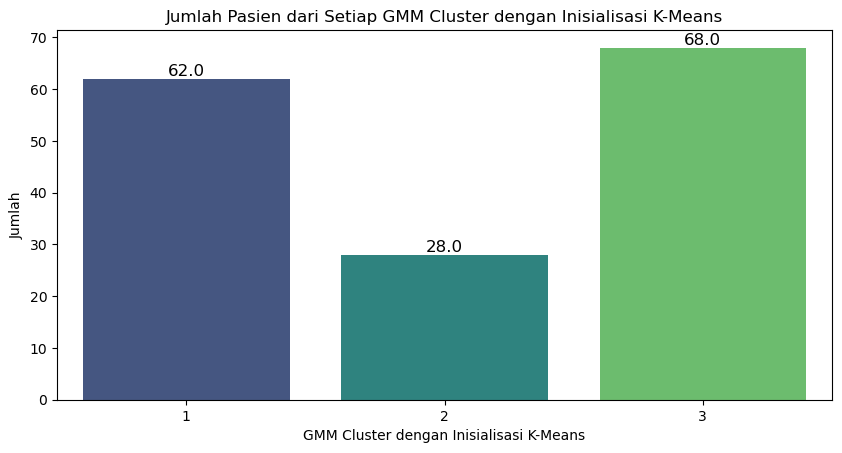

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah data dalam setiap cluster
cluster_counts1 = X['GMM_Clusters_KMeans'].value_counts().reset_index()
cluster_counts1.columns = ['GMM_Clusters_KMeans', 'Count']

# Membuat diagram batang
plt.figure(figsize=(10, 4.8))
ax = sns.barplot(x='GMM_Clusters_KMeans', y='Count', data=cluster_counts1.sort_values('GMM_Clusters_KMeans'), palette='viridis')

# Menambahkan teks jumlah di atas masing-masing batang
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)

# Menambahkan label pada sumbu dan judul diagram
plt.xlabel('GMM Cluster dengan Inisialisasi K-Means')
plt.ylabel('Jumlah')
plt.title('Jumlah Pasien dari Setiap GMM Cluster dengan Inisialisasi K-Means')

# Menampilkan diagram batang
plt.show()

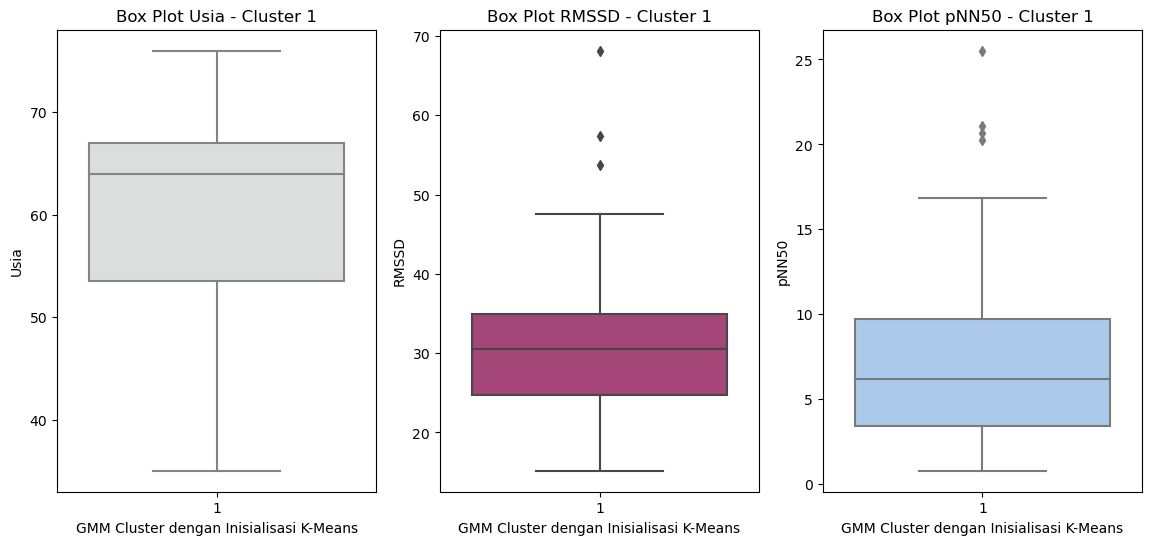

In [110]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data untuk Cluster 1
cluster_1_data = X[X['GMM_Clusters_KMeans'] == 1]

# Buat plot untuk Usia
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
tt = sns.boxplot(x='GMM_Clusters_KMeans', y='usia', data=cluster_1_data, ax=ax[0], palette='coolwarm_r')
tt.set_title('Box Plot Usia - Cluster 1')
tt.set_ylabel('Usia')
tt.set_xlabel('GMM Cluster dengan Inisialisasi K-Means')

# Buat plot untuk pNN50
tr = sns.boxplot(x='GMM_Clusters_KMeans', y='rmssd', data=cluster_1_data, ax=ax[1], palette='magma_r')
tr.set_title('Box Plot RMSSD - Cluster 1')
tr.set_ylabel('RMSSD')
tr.set_xlabel('GMM Cluster dengan Inisialisasi K-Means')

# Buat plot untuk RMSSD
tm = sns.boxplot(x='GMM_Clusters_KMeans', y='pnni_50', data=cluster_1_data, ax=ax[2], palette='pastel')
tm.set_title('Box Plot pNN50 - Cluster 1')
tm.set_ylabel('pNN50')
tm.set_xlabel('GMM Cluster dengan Inisialisasi K-Means')

plt.show()

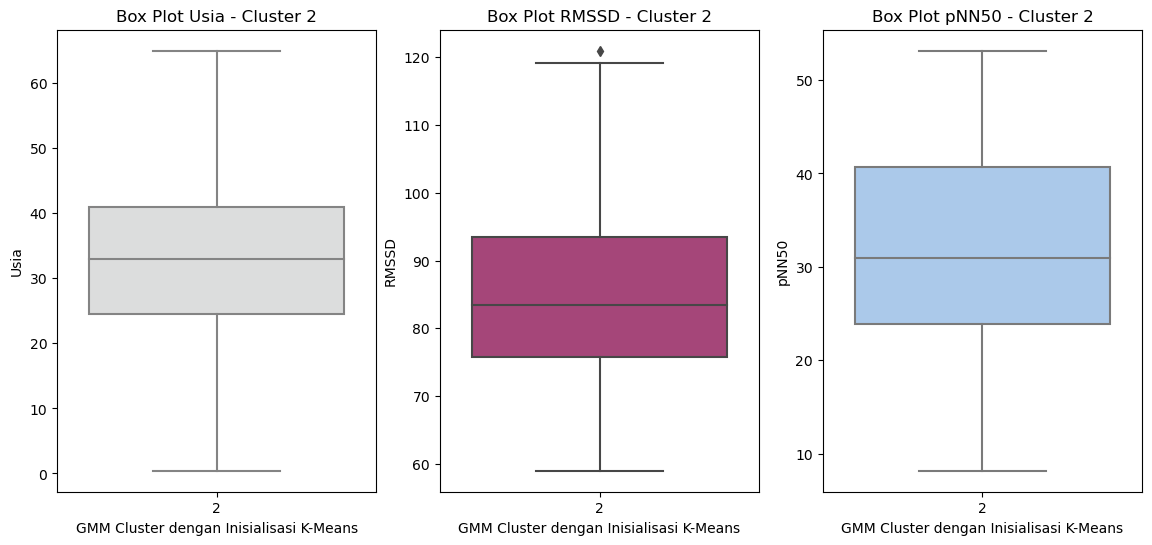

In [111]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data untuk Cluster 2
cluster_2_data = X[X['GMM_Clusters_KMeans'] == 2]

# Buat plot untuk Usia
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
tt = sns.boxplot(x='GMM_Clusters_KMeans', y='usia', data=cluster_2_data, ax=ax[0], palette='coolwarm_r')
tt.set_title('Box Plot Usia - Cluster 2')
tt.set_ylabel('Usia')
tt.set_xlabel('GMM Cluster dengan Inisialisasi K-Means')

# Buat plot untuk pNN50
tr = sns.boxplot(x='GMM_Clusters_KMeans', y='rmssd', data=cluster_2_data, ax=ax[1], palette='magma_r')
tr.set_title('Box Plot RMSSD - Cluster 2')
tr.set_ylabel('RMSSD')
tr.set_xlabel('GMM Cluster dengan Inisialisasi K-Means')

# Buat plot untuk RMSSD
tm = sns.boxplot(x='GMM_Clusters_KMeans', y='pnni_50', data=cluster_2_data, ax=ax[2], palette='pastel')
tm.set_title('Box Plot pNN50 - Cluster 2')
tm.set_ylabel('pNN50')
tm.set_xlabel('GMM Cluster dengan Inisialisasi K-Means')

plt.show()

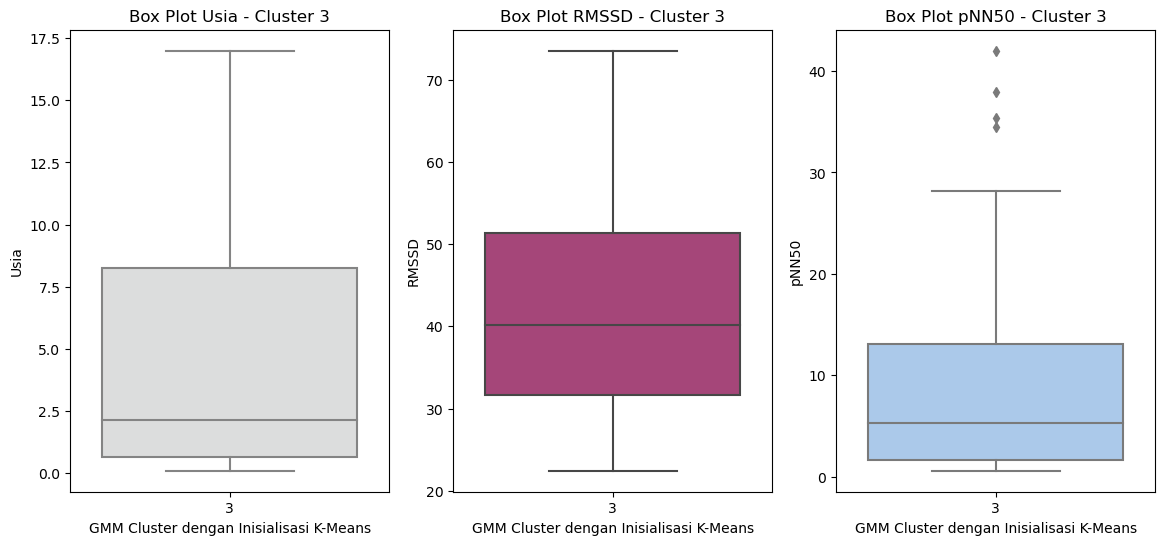

In [112]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data untuk Cluster 3
cluster_3_data = X[X['GMM_Clusters_KMeans'] == 3]

# Buat plot untuk Usia
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
tt = sns.boxplot(x='GMM_Clusters_KMeans', y='usia', data=cluster_3_data, ax=ax[0], palette='coolwarm_r')
tt.set_title('Box Plot Usia - Cluster 3')
tt.set_ylabel('Usia')
tt.set_xlabel('GMM Cluster dengan Inisialisasi K-Means')

# Buat plot untuk pNN50
tr = sns.boxplot(x='GMM_Clusters_KMeans', y='rmssd', data=cluster_3_data, ax=ax[1], palette='magma_r')
tr.set_title('Box Plot RMSSD - Cluster 3')
tr.set_ylabel('RMSSD')
tr.set_xlabel('GMM Cluster dengan Inisialisasi K-Means')

# Buat plot untuk RMSSD
tm = sns.boxplot(x='GMM_Clusters_KMeans', y='pnni_50', data=cluster_3_data, ax=ax[2], palette='pastel')
tm.set_title('Box Plot pNN50 - Cluster 3')
tm.set_ylabel('pNN50')
tm.set_xlabel('GMM Cluster dengan Inisialisasi K-Means')

plt.show()

# Visualisasi Metrik Evaluasi

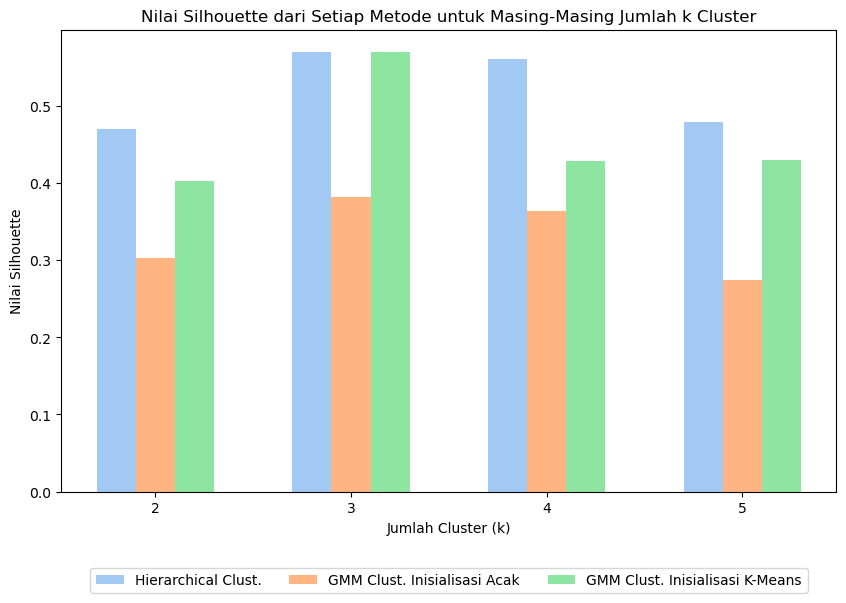

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Menambahkan seaborn untuk palet warna pastel

# Data
data = {
    'k': [2, 3, 4, 5],
    'Hierarchical Clustering': [0.4701, 0.5703, 0.5603, 0.4785],
    'GMM Clustering dengan Inisialisasi Acak': [0.3032, 0.3814, 0.3642, 0.274],
    'GMM Clustering dengan Inisialisasi K-Means': [0.4029, 0.57, 0.4287, 0.4298]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Mengatur palet warna menjadi "pastel"
sns.set_palette("pastel")

# Visualisasi
plt.figure(figsize=(10, 6))

# Bar chart
bar_width = 0.2
plt.bar(df['k'] - bar_width, df['Hierarchical Clustering'], width=bar_width, label='Hierarchical Clust.')
plt.bar(df['k'], df['GMM Clustering dengan Inisialisasi Acak'], width=bar_width, label='GMM Clust. Inisialisasi Acak')
plt.bar(df['k'] + bar_width, df['GMM Clustering dengan Inisialisasi K-Means'], width=bar_width, label='GMM Clust. Inisialisasi K-Means')

# Menambahkan label dan judul
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Nilai Silhouette')
plt.title('Nilai Silhouette dari Setiap Metode untuk Masing-Masing Jumlah k Cluster')
plt.legend()

# Menentukan sumbu x hanya mencakup nilai 2, 3, 4, dan 5
plt.xticks(df['k'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Menampilkan plot
plt.show()

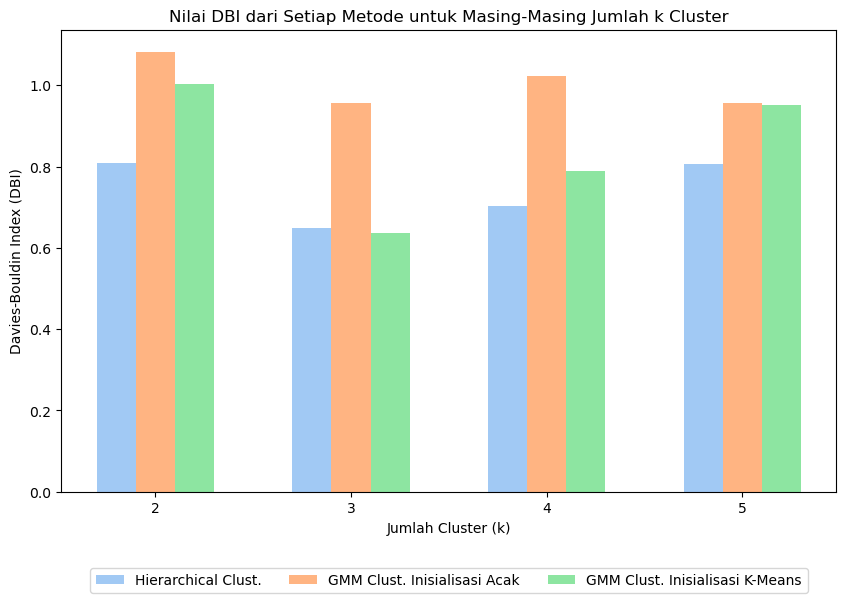

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data_dbi = {
    'k': [2, 3, 4, 5],
    'Hierarchical Clustering': [0.8089, 0.6496, 0.7018, 0.8058],
    'GMM Clustering dengan Inisialisasi Acak': [1.0826, 0.9555, 1.0238, 0.9551],
    'GMM Clustering dengan Inisialisasi K-Means': [1.0019, 0.6356, 0.7878, 0.9512]
}

# Membuat DataFrame untuk Davies-Bouldin Index
df_dbi = pd.DataFrame(data_dbi)

# Mengatur palet warna menjadi "pastel"
sns.set_palette("pastel")

# Visualisasi
plt.figure(figsize=(10, 6))

# Bar chart
bar_width = 0.2
plt.bar(df_dbi['k'] - bar_width, df_dbi['Hierarchical Clustering'], width=bar_width, label='Hierarchical Clust.')
plt.bar(df_dbi['k'], df_dbi['GMM Clustering dengan Inisialisasi Acak'], width=bar_width, label='GMM Clust. Inisialisasi Acak')
plt.bar(df_dbi['k'] + bar_width, df_dbi['GMM Clustering dengan Inisialisasi K-Means'], width=bar_width, label='GMM Clust. Inisialisasi K-Means')

# Menambahkan label dan judul
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Davies-Bouldin Index (DBI)')
plt.title('Nilai DBI dari Setiap Metode untuk Masing-Masing Jumlah k Cluster')

# Menentukan sumbu x hanya mencakup nilai 2, 3, 4, dan 5
plt.xticks(df_dbi['k'])

# Menempatkan legend di bawah grafik dengan bbox_to_anchor dan loc
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Menampilkan plot
plt.show()

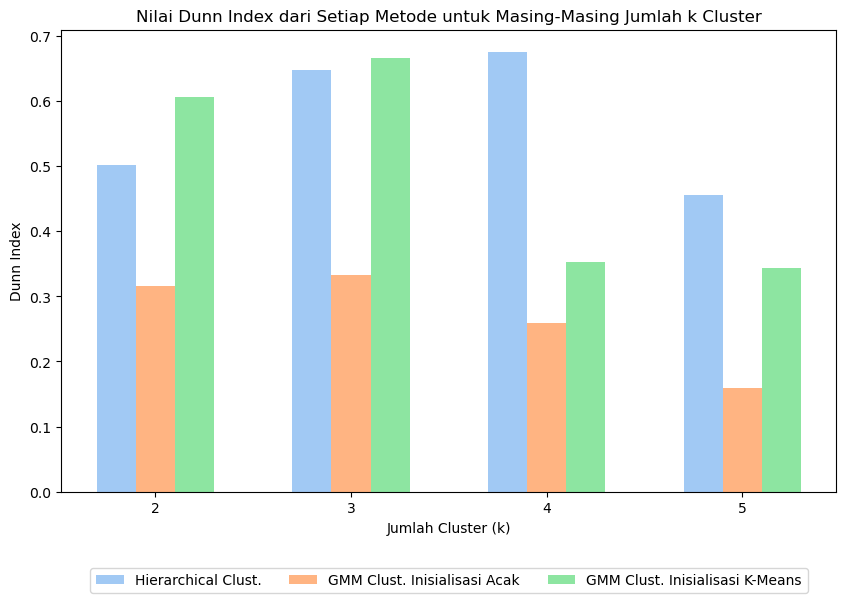

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data_dunn = {
    'k': [2, 3, 4, 5],
    'Hierarchical Clustering': [0.5016, 0.6481, 0.6759, 0.4554],
    'GMM Clustering dengan Inisialisasi Acak': [0.3155, 0.3331, 0.259, 0.1588],
    'GMM Clustering dengan Inisialisasi K-Means': [0.6067, 0.6655, 0.3528, 0.3436]
}

# Membuat DataFrame untuk Dunn Index
df_dunn = pd.DataFrame(data_dunn)

# Mengatur palet warna menjadi "pastel"
sns.set_palette("pastel")

# Visualisasi
plt.figure(figsize=(10, 6))

# Bar chart
bar_width = 0.2
plt.bar(df_dunn['k'] - bar_width, df_dunn['Hierarchical Clustering'], width=bar_width, label='Hierarchical Clust.')
plt.bar(df_dunn['k'], df_dunn['GMM Clustering dengan Inisialisasi Acak'], width=bar_width, label='GMM Clust. Inisialisasi Acak')
plt.bar(df_dunn['k'] + bar_width, df_dunn['GMM Clustering dengan Inisialisasi K-Means'], width=bar_width, label='GMM Clust. Inisialisasi K-Means')

# Menambahkan label dan judul
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Dunn Index')
plt.title('Nilai Dunn Index dari Setiap Metode untuk Masing-Masing Jumlah k Cluster')
plt.legend()

# Menentukan sumbu x hanya mencakup nilai 2, 3, 4, dan 5
plt.xticks(df_dunn['k'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Menampilkan plot
plt.show()

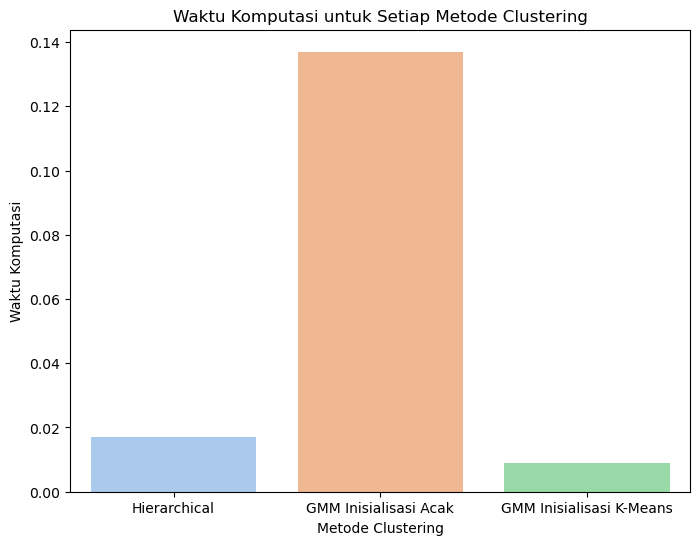

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data_execution_time = {
    'Metode Clustering': ['Hierarchical', 'GMM Inisialisasi Acak', 'GMM Inisialisasi K-Means'],
    'Durasi Waktu Eksekusi': [0.017, 0.137, 0.009]
}

# Membuat DataFrame
df_execution_time = pd.DataFrame(data_execution_time)

# Mengatur palet warna menjadi "pastel"
sns.set_palette("pastel")

# Visualisasi
plt.figure(figsize=(8, 6))

# Bar plot
sns.barplot(x='Metode Clustering', y='Durasi Waktu Eksekusi', data=df_execution_time)

# Menambahkan label dan judul
plt.xlabel('Metode Clustering')
plt.ylabel('Waktu Komputasi')
plt.title('Waktu Komputasi untuk Setiap Metode Clustering')

# Menampilkan plot
plt.show()

# OUTLIER DIHAPUS -> Metrik Evaluasi Menurun

In [41]:
import pandas as pd

# Misalkan data Anda sudah di-load ke dalam DataFrame X1
# Contoh data:

# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_no_outliers

# Pilih kolom 'rmssd' untuk dihapus outlier-nya
column_to_remove_outliers = 'rmssd'

# Panggil fungsi untuk menghapus outlier
X1_no_outliers1 = remove_outliers(X1, column_to_remove_outliers)

# Tampilkan DataFrame setelah menghapus outlier
print(X1_no_outliers1)

         rmssd    pnni_50   usia
0    15.177757   0.789517  65.00
1    16.621134   0.949012  72.00
2    17.614672   1.282040  64.00
3    19.228316   1.737907  63.00
4    20.249970   1.458022  63.00
..         ...        ...    ...
148  87.596751  43.135163  35.00
149  89.152499  50.669783   5.83
150  92.843984  29.550687  32.00
151  95.248453  22.979101  45.00
152  98.022798  44.249285  12.00

[153 rows x 3 columns]


In [42]:
import pandas as pd

# Misalkan data Anda sudah di-load ke dalam DataFrame X1
# Contoh data:

# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_no_outliers

# Pilih kolom 'rmssd' untuk dihapus outlier-nya
column_to_remove_outliers = 'pnni_50'

# Panggil fungsi untuk menghapus outlier
X1_no_outliers2 = remove_outliers(X1_no_outliers1, column_to_remove_outliers)

# Tampilkan DataFrame setelah menghapus outlier
print(X1_no_outliers2)

         rmssd    pnni_50  usia
0    15.177757   0.789517  65.0
1    16.621134   0.949012  72.0
2    17.614672   1.282040  64.0
3    19.228316   1.737907  63.0
4    20.249970   1.458022  63.0
..         ...        ...   ...
145  85.124322  32.161054  34.0
146  86.366115  34.601416  20.0
147  87.224540  31.982139  41.0
150  92.843984  29.550687  32.0
151  95.248453  22.979101  45.0

[147 rows x 3 columns]


In [45]:
X1 = X1_no_outliers2.copy()
X = X1_no_outliers2.copy()

Silhouette

In [60]:
# KMeans
kmeans_silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    labels = kmeans.predict(X1)
    silhouette_avg = silhouette_score(X, labels)
    kmeans_silhouette_scores.append(silhouette_avg)

# GMM dengan inisialisasi acak
gmm_random_silhouette_scores = []
for k in range(2, 11):
    gmm_random = GaussianMixture(n_components=k, covariance_type='full', init_params='random', random_state=42)
    gmm_random.fit(X1)
    labels = gmm_random.predict(X1)
    silhouette_avg = silhouette_score(X, labels)
    gmm_random_silhouette_scores.append(silhouette_avg)

# GMM dengan inisialisasi kmeans
gmm_kmeans_silhouette_scores = []
for k in range(2, 11):
    gmm_kmeans = GaussianMixture(n_components=k, covariance_type='full', init_params='kmeans', random_state=42)
    gmm_kmeans.fit(X1)
    labels = gmm_kmeans.predict(X1)
    silhouette_avg = silhouette_score(X, labels)
    gmm_kmeans_silhouette_scores.append(silhouette_avg)
    

# Hierarchical Clustering
hierarchical_silhouette_scores = []
for k in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarchical.fit_predict(X1)
    silhouette_avg = silhouette_score(X, labels)
    hierarchical_silhouette_scores.append(silhouette_avg)

# Menampilkan hasil silhouette score untuk setiap nilai k
for k, score_kmeans, score_gmm_random, score_gmm_kmeans, score_hierarchical in zip(
    range(2, 11), 
    kmeans_silhouette_scores, 
    gmm_random_silhouette_scores, 
    gmm_kmeans_silhouette_scores, 
    hierarchical_silhouette_scores
):
    print(f"Silhouette Score for k={k} (KMeans): {score_kmeans}")
    print(f"Silhouette Score for k={k} (GMM - Random Initialization): {score_gmm_random}")
    print(f"Silhouette Score for k={k} (GMM - KMeans Initialization): {score_gmm_kmeans}")
    print(f"Silhouette Score for k={k} (Hierarchical): {score_hierarchical}")
    print()

Silhouette Score for k=2 (KMeans): 0.5291378113483882
Silhouette Score for k=2 (GMM - Random Initialization): 0.380858481442877
Silhouette Score for k=2 (GMM - KMeans Initialization): 0.5266589931233093
Silhouette Score for k=2 (Hierarchical): 0.5094243663101404

Silhouette Score for k=3 (KMeans): 0.5394557463417891
Silhouette Score for k=3 (GMM - Random Initialization): 0.25569731682693775
Silhouette Score for k=3 (GMM - KMeans Initialization): 0.48988640073893475
Silhouette Score for k=3 (Hierarchical): 0.5897411335037304

Silhouette Score for k=4 (KMeans): 0.5219814102135419
Silhouette Score for k=4 (GMM - Random Initialization): 0.2979998658951915
Silhouette Score for k=4 (GMM - KMeans Initialization): 0.4621249216718666
Silhouette Score for k=4 (Hierarchical): 0.4958456916142988

Silhouette Score for k=5 (KMeans): 0.5097871123846517
Silhouette Score for k=5 (GMM - Random Initialization): 0.2422104291781485
Silhouette Score for k=5 (GMM - KMeans Initialization): 0.48198591603507224

DBI

In [59]:
# KMeans
kmeans_dbi_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    labels = kmeans.predict(X1)
    dbi = davies_bouldin_score(X, labels)
    kmeans_dbi_scores.append(dbi)

# GMM dengan inisialisasi acak
gmm_random_dbi_scores = []
for k in range(2, 11):
    gmm_random = GaussianMixture(n_components=k, covariance_type='full', init_params='random', random_state=42)
    gmm_random.fit(X1)
    labels = gmm_random.predict(X1)
    dbi = davies_bouldin_score(X, labels)
    gmm_random_dbi_scores.append(dbi)

# GMM dengan inisialisasi kmeans
gmm_kmeans_dbi_scores = []
for k in range(2, 11):
    gmm_kmeans = GaussianMixture(n_components=k, covariance_type='full', init_params='kmeans', random_state=42)
    gmm_kmeans.fit(X1)
    labels = gmm_kmeans.predict(X1)
    dbi = davies_bouldin_score(X, labels)
    gmm_kmeans_dbi_scores.append(dbi)
    
# Hierarchical Clustering
hierarchical_dbi_scores = []
for k in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarchical.fit_predict(X)
    dbi = davies_bouldin_score(X, labels)
    hierarchical_dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index untuk setiap nilai k
for k, dbi_kmeans, dbi_gmm_random, dbi_gmm_kmeans, dbi_hierarchical in zip(
    range(2, 11), 
    kmeans_dbi_scores, 
    gmm_random_dbi_scores, 
    gmm_kmeans_dbi_scores, 
    hierarchical_dbi_scores
):
    print(f"Davies-Bouldin Index for k={k} (KMeans): {dbi_kmeans}")
    print(f"Davies-Bouldin Index for k={k} (GMM - Random Initialization): {dbi_gmm_random}")
    print(f"Davies-Bouldin Index for k={k} (GMM - KMeans Initialization): {dbi_gmm_kmeans}")
    print(f"Davies-Bouldin Index for k={k} (Hierarchical): {dbi_hierarchical}")
    print()

Davies-Bouldin Index for k=2 (KMeans): 0.7216292428702282
Davies-Bouldin Index for k=2 (GMM - Random Initialization): 1.0585115939933263
Davies-Bouldin Index for k=2 (GMM - KMeans Initialization): 0.7045887499899257
Davies-Bouldin Index for k=2 (Hierarchical): 0.7511312242649066

Davies-Bouldin Index for k=3 (KMeans): 0.6467022811133737
Davies-Bouldin Index for k=3 (GMM - Random Initialization): 2.4767827984818296
Davies-Bouldin Index for k=3 (GMM - KMeans Initialization): 1.0438667565319124
Davies-Bouldin Index for k=3 (Hierarchical): 0.6995811977438214

Davies-Bouldin Index for k=4 (KMeans): 0.748059504684212
Davies-Bouldin Index for k=4 (GMM - Random Initialization): 1.3871905588257416
Davies-Bouldin Index for k=4 (GMM - KMeans Initialization): 0.7311368538724728
Davies-Bouldin Index for k=4 (Hierarchical): 0.774612634554976

Davies-Bouldin Index for k=5 (KMeans): 0.716819716382423
Davies-Bouldin Index for k=5 (GMM - Random Initialization): 1.869812362861266
Davies-Bouldin Index for

Dunn Index

In [50]:
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.spatial import distance
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Kode perhitungan Dunn Index
dunn_scores = []

for k in range(2, 11):  # Coba untuk k dari 2 hingga 10
    # Membuat model GMM dengan covariance type 'tied'
    gmm = GaussianMixture(n_components=k, covariance_type='tied', tol=0.0001, init_params='kmeans',random_state=0)
    gmm.fit(X)

    # Mendapatkan label kluster untuk setiap data point
    cluster_labels = gmm.predict(X)
    centers = gmm.means_

    # Menghitung dmin (minimal jarak antar kluster)
    dmin = np.inf
    for i in range(k):
        for j in range(i + 1, k):
            dist = distance.euclidean(centers[i], centers[j])
            if dist < dmin:
                dmin = dist

    # Menghitung dmax (maksimal jarak dalam kluster)
    dmax = 0
    for i in range(k):
        cluster_points = X[cluster_labels == i].values
        max_diameter = 0
        for p1 in range(len(cluster_points)):
            for p2 in range(p1 + 1, len(cluster_points)):
                d = distance.euclidean(cluster_points[p1], cluster_points[p2])
                if d > max_diameter:
                    max_diameter = d
        if max_diameter > dmax:
            dmax = max_diameter

    # Menghitung Dunn Index (DI)
    di = dmin / dmax
    dunn_scores.append(di)

# Membuat DataFrame untuk hasil Dunn Index
k_values = list(range(2, 11))
df_dunn = pd.DataFrame({'K': k_values, 'Dunn Index': dunn_scores})

# Menampilkan hasil Dunn Index
print(df_dunn)

C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

    K  Dunn Index
0   2    0.616836
1   3    0.489952
2   4    0.423115
3   5    0.491204
4   6    0.602999
5   7    0.025586
6   8    0.000335
7   9    0.013768
8  10    0.134882


C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.spatial import distance
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Kode perhitungan Dunn Index
dunn_scores = []

for k in range(2, 11):  # Coba untuk k dari 2 hingga 10
    # Membuat model GMM dengan covariance type 'tied'
    gmm = GaussianMixture(n_components=k, covariance_type='full', tol=0.0001, init_params='random',random_state=0)
    gmm.fit(X)

    # Mendapatkan label kluster untuk setiap data point
    cluster_labels = gmm.predict(X)
    centers = gmm.means_

    # Menghitung dmin (minimal jarak antar kluster)
    dmin = np.inf
    for i in range(k):
        for j in range(i + 1, k):
            dist = distance.euclidean(centers[i], centers[j])
            if dist < dmin:
                dmin = dist

    # Menghitung dmax (maksimal jarak dalam kluster)
    dmax = 0
    for i in range(k):
        cluster_points = X[cluster_labels == i].values
        max_diameter = 0
        for p1 in range(len(cluster_points)):
            for p2 in range(p1 + 1, len(cluster_points)):
                d = distance.euclidean(cluster_points[p1], cluster_points[p2])
                if d > max_diameter:
                    max_diameter = d
        if max_diameter > dmax:
            dmax = max_diameter

    # Menghitung Dunn Index (DI)
    di = dmin / dmax
    dunn_scores.append(di)

# Membuat DataFrame untuk hasil Dunn Index
k_values = list(range(2, 11))
df_dunn = pd.DataFrame({'K': k_values, 'Dunn Index': dunn_scores})

# Menampilkan hasil Dunn Index
print(df_dunn)

    K  Dunn Index
0   2    0.527267
1   3    0.122470
2   4    0.205963
3   5    0.257855
4   6    0.194300
5   7    0.312360
6   8    0.166240
7   9    0.113449
8  10    0.144602


In [58]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance
import numpy as np

# Kode yang digunakan untuk menghitung Dunn Index
dunn_indices = []

# Loop untuk menguji berbagai jumlah cluster (k)
for k in range(1, 11):
    if k == 1:
        dunn_indices.append(0)  # Menambahkan nilai 0 untuk k=1
        continue

    # Menginisialisasi model Agglomerative Clustering dengan k kluster dan metode Ward
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')

    # Melakukan clustering
    cluster_labels = model.fit_predict(X)

    # Menghitung pusat kluster
    cluster_centers = [X[cluster_labels == i].mean(axis=0) for i in range(k)]

    # Menghitung dmin (minimal jarak antara kluster)
    dmin = np.inf
    for i in range(k):
        for j in range(i + 1, k):
            d = distance.euclidean(cluster_centers[i], cluster_centers[j])
            if d < dmin:
                dmin = d

    # Menghitung dmax (maksimal jarak dalam kluster)
    dmax = 0
    for i in range(k):
        cluster_points = X[cluster_labels == i].values  # Mengakses nilai DataFrame sebagai array NumPy
        max_diameter = 0
        for p1 in range(len(cluster_points)):
            for p2 in range(p1 + 1, len(cluster_points)):
                d = distance.euclidean(cluster_points[p1], cluster_points[p2])
                if d > max_diameter:
                    max_diameter = d
        if max_diameter > dmax:
            dmax = max_diameter
            
    # Menghitung Dunn Index
    dunn_index = dmin / dmax

    # Menyimpan Dunn Index ke dalam list
    dunn_indices.append(dunn_index)

# Menampilkan hasil Dunn Index untuk setiap nilai k
for k, dunn in enumerate(dunn_indices, start=1):
    print(f"Dunn Index for k={k}: {round(dunn, 4)}")

Dunn Index for k=1: 0
Dunn Index for k=2: 0.5998
Dunn Index for k=3: 0.6044
Dunn Index for k=4: 0.4377
Dunn Index for k=5: 0.4582
Dunn Index for k=6: 0.3717
Dunn Index for k=7: 0.4186
Dunn Index for k=8: 0.293
Dunn Index for k=9: 0.3323
Dunn Index for k=10: 0.3156


# DENGAN KMEANS++ -> Metrik Evaluasi Menurun

Silhouette

In [25]:
# KMeans
kmeans_silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    labels = kmeans.predict(X1)
    silhouette_avg = silhouette_score(X, labels)
    kmeans_silhouette_scores.append(silhouette_avg)

# GMM dengan inisialisasi acak
gmm_random_silhouette_scores = []
for k in range(2, 11):
    gmm_random = GaussianMixture(n_components=k, covariance_type='full', init_params='random', random_state=42)
    gmm_random.fit(X1)
    labels = gmm_random.predict(X1)
    silhouette_avg = silhouette_score(X, labels)
    gmm_random_silhouette_scores.append(silhouette_avg)

# GMM dengan inisialisasi kmeans
gmm_kmeans_silhouette_scores = []
for k in range(2, 11):
    gmm_kmeans = GaussianMixture(n_components=k, covariance_type='full', init_params='k-means++', random_state=42)
    gmm_kmeans.fit(X1)
    labels = gmm_kmeans.predict(X1)
    silhouette_avg = silhouette_score(X, labels)
    gmm_kmeans_silhouette_scores.append(silhouette_avg)
    

# Hierarchical Clustering
hierarchical_silhouette_scores = []
for k in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarchical.fit_predict(X1)
    silhouette_avg = silhouette_score(X, labels)
    hierarchical_silhouette_scores.append(silhouette_avg)

# Menampilkan hasil silhouette score untuk setiap nilai k
for k, score_kmeans, score_gmm_random, score_gmm_kmeans, score_hierarchical in zip(
    range(2, 11), 
    kmeans_silhouette_scores, 
    gmm_random_silhouette_scores, 
    gmm_kmeans_silhouette_scores, 
    hierarchical_silhouette_scores
):
    print(f"Silhouette Score for k={k} (KMeans): {score_kmeans}")
    print(f"Silhouette Score for k={k} (GMM - Random Initialization): {score_gmm_random}")
    print(f"Silhouette Score for k={k} (GMM - KMeans Initialization): {score_gmm_kmeans}")
    print(f"Silhouette Score for k={k} (Hierarchical): {score_hierarchical}")
    print()

C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

Silhouette Score for k=2 (KMeans): 0.4835943213888134
Silhouette Score for k=2 (GMM - Random Initialization): 0.31742469893436803
Silhouette Score for k=2 (GMM - KMeans Initialization): 0.3055876635202186
Silhouette Score for k=2 (Hierarchical): 0.4699042212206745

Silhouette Score for k=3 (KMeans): 0.5761333792216881
Silhouette Score for k=3 (GMM - Random Initialization): 0.09426745287510582
Silhouette Score for k=3 (GMM - KMeans Initialization): 0.44158128714435513
Silhouette Score for k=3 (Hierarchical): 0.5701619634796742

Silhouette Score for k=4 (KMeans): 0.5566183751063773
Silhouette Score for k=4 (GMM - Random Initialization): 0.3027771049913317
Silhouette Score for k=4 (GMM - KMeans Initialization): 0.39184503045188
Silhouette Score for k=4 (Hierarchical): 0.5601085726808115

Silhouette Score for k=5 (KMeans): 0.48820591360890153
Silhouette Score for k=5 (GMM - Random Initialization): 0.24432155791054608
Silhouette Score for k=5 (GMM - KMeans Initialization): 0.330181288323155

DBI

In [26]:
# KMeans
kmeans_dbi_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    labels = kmeans.predict(X1)
    dbi = davies_bouldin_score(X, labels)
    kmeans_dbi_scores.append(dbi)

# GMM dengan inisialisasi acak
gmm_random_dbi_scores = []
for k in range(2, 11):
    gmm_random = GaussianMixture(n_components=k, covariance_type='full', init_params='random', random_state=42)
    gmm_random.fit(X1)
    labels = gmm_random.predict(X1)
    dbi = davies_bouldin_score(X, labels)
    gmm_random_dbi_scores.append(dbi)

# GMM dengan inisialisasi kmeans
gmm_kmeans_dbi_scores = []
for k in range(2, 11):
    gmm_kmeans = GaussianMixture(n_components=k, covariance_type='full', init_params='k-means++', random_state=42)
    gmm_kmeans.fit(X1)
    labels = gmm_kmeans.predict(X1)
    dbi = davies_bouldin_score(X, labels)
    gmm_kmeans_dbi_scores.append(dbi)
    
# Hierarchical Clustering
hierarchical_dbi_scores = []
for k in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarchical.fit_predict(X)
    dbi = davies_bouldin_score(X, labels)
    hierarchical_dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index untuk setiap nilai k
for k, dbi_kmeans, dbi_gmm_random, dbi_gmm_kmeans, dbi_hierarchical in zip(
    range(2, 11), 
    kmeans_dbi_scores, 
    gmm_random_dbi_scores, 
    gmm_kmeans_dbi_scores, 
    hierarchical_dbi_scores
):
    print(f"Davies-Bouldin Index for k={k} (KMeans): {dbi_kmeans}")
    print(f"Davies-Bouldin Index for k={k} (GMM - Random Initialization): {dbi_gmm_random}")
    print(f"Davies-Bouldin Index for k={k} (GMM - KMeans Initialization): {dbi_gmm_kmeans}")
    print(f"Davies-Bouldin Index for k={k} (Hierarchical): {dbi_hierarchical}")
    print()

C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

Davies-Bouldin Index for k=2 (KMeans): 0.8081643777762577
Davies-Bouldin Index for k=2 (GMM - Random Initialization): 1.2797533742341858
Davies-Bouldin Index for k=2 (GMM - KMeans Initialization): 1.211927422858207
Davies-Bouldin Index for k=2 (Hierarchical): 0.8088726541449714

Davies-Bouldin Index for k=3 (KMeans): 0.6423937475744762
Davies-Bouldin Index for k=3 (GMM - Random Initialization): 2.049326671480185
Davies-Bouldin Index for k=3 (GMM - KMeans Initialization): 0.8779585911043659
Davies-Bouldin Index for k=3 (Hierarchical): 0.6496116664286586

Davies-Bouldin Index for k=4 (KMeans): 0.8337250231886643
Davies-Bouldin Index for k=4 (GMM - Random Initialization): 1.265136337148388
Davies-Bouldin Index for k=4 (GMM - KMeans Initialization): 1.0250376907699017
Davies-Bouldin Index for k=4 (Hierarchical): 0.7018413743481503

Davies-Bouldin Index for k=5 (KMeans): 0.8565847478625432
Davies-Bouldin Index for k=5 (GMM - Random Initialization): 1.2701758581971272
Davies-Bouldin Index fo

Dunn Index

In [27]:
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.spatial import distance
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Kode perhitungan Dunn Index
dunn_scores = []

for k in range(2, 11):  # Coba untuk k dari 2 hingga 10
    # Membuat model GMM dengan covariance type 'tied'
    gmm = GaussianMixture(n_components=k, covariance_type='full', tol=0.0001, init_params='k-means++',random_state=42)
    gmm.fit(X)

    # Mendapatkan label kluster untuk setiap data point
    cluster_labels = gmm.predict(X)
    centers = gmm.means_

    # Menghitung dmin (minimal jarak antar kluster)
    dmin = np.inf
    for i in range(k):
        for j in range(i + 1, k):
            dist = distance.euclidean(centers[i], centers[j])
            if dist < dmin:
                dmin = dist

    # Menghitung dmax (maksimal jarak dalam kluster)
    dmax = 0
    for i in range(k):
        cluster_points = X[cluster_labels == i].values
        max_diameter = 0
        for p1 in range(len(cluster_points)):
            for p2 in range(p1 + 1, len(cluster_points)):
                d = distance.euclidean(cluster_points[p1], cluster_points[p2])
                if d > max_diameter:
                    max_diameter = d
        if max_diameter > dmax:
            dmax = max_diameter

    # Menghitung Dunn Index (DI)
    di = dmin / dmax
    dunn_scores.append(di)

# Membuat DataFrame untuk hasil Dunn Index
k_values = list(range(2, 11))
df_dunn = pd.DataFrame({'K': k_values, 'Dunn Index': dunn_scores})

# Menampilkan hasil Dunn Index
print(df_dunn)

    K  Dunn Index
0   2    0.005466
1   3    0.007383
2   4    0.007430
3   5    0.004779
4   6    0.005792
5   7    0.006743
6   8    0.001474
7   9    0.001690
8  10    0.001936


# HASIL GMM CLUSTERING DG INISIALISASI KMEANS VS KMEANS

In [14]:
# Grouping data berdasarkan kolom "Cluster" dan menghitung statistik
cluster_statsz = X.groupby('KMeans_Cluster')[['pnni_50', 'rmssd', 'usia']].agg(
    {
        'rmssd': ['min', 'max', 'mean', 'var'],
        'pnni_50': ['min', 'max', 'mean', 'var'],
        'usia': ['min', 'max', 'mean', 'var']
    }
)

# Menampilkan hasil statistik
cluster_statsz

rmssd                                      pnni_50  \
                      min         max       mean         var       min   
KMeans_Cluster                                                           
1               22.455164   66.870694  40.390180  119.950549  0.587804   
2               15.177757   68.157090  31.295355   97.509481  0.789517   
3               58.952434  120.984531  83.633542  270.794713  8.190888   

                                                    usia                   \
                      max       mean         var     min   max       mean   
KMeans_Cluster                                                              
1               28.141352   7.841224   60.394269   0.083  29.0   5.727701   
2               25.514547   7.176326   28.734419  34.000  76.0  60.186441   
3               53.135276  32.446346  116.154690   0.083  65.0  28.239469   

                            
                       var  
KMeans_Cluster              
1                46.992652  
2               126.395675  
3               312.520905

In [18]:
# Grouping data berdasarkan kolom "Cluster" dan menghitung statistik
cluster_statsz = X.groupby('GMM_Clusters_KMeans')[['pnni_50', 'rmssd', 'usia']].agg(
    {
        'rmssd': ['min', 'max', 'mean', 'std'],
        'pnni_50': ['min', 'max', 'mean', 'std'],
        'usia': ['min', 'max', 'mean', 'std']
    }
)

# Menampilkan hasil statistik
cluster_statsz

rmssd                                    pnni_50  \
                           min         max       mean       std       min   
GMM_Clusters_KMeans                                                         
1                    15.177757   68.157090  31.463272   9.80531  0.789517   
2                    58.952434  120.984531  85.747788  16.49137  8.190888   
3                    22.455164   73.507994  42.311477  12.62691  0.587804   

                                                        usia                   \
                           max       mean        std     min   max       mean   
GMM_Clusters_KMeans                                                             
1                    25.514547   7.212323   5.275155  35.000  76.0  59.080645   
2                    53.135276  31.731995  11.307780   0.420  65.0  31.681429   
3                    41.997488   9.579241  10.431997   0.083  17.0   4.688809   

                                
                           std  
GMM_Clusters_KMeans             
1                    12.023608  
2                    16.063407  
3                     5.054312

In [5]:
# Grouping data berdasarkan kolom "Cluster" dan menghitung statistik
cluster_statsz = X.groupby('GMM_Clusters_KMeans')[['pnni_50', 'rmssd', 'usia']].agg(
    {
        'rmssd': ['min', 'max', 'mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)],
        'pnni_50': ['min', 'max', 'mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)],
        'usia': ['min', 'max', 'mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)]
    }
)

# Menampilkan hasil statistik
cluster_statsz

rmssd                                              \
                           min         max       mean       std <lambda_0>   
GMM_Clusters_KMeans                                                          
1                    15.177757   68.157090  31.463272   9.80531  24.711982   
2                    58.952434  120.984531  85.747788  16.49137  75.697028   
3                    22.455164   73.507994  42.311477  12.62691  31.682833   

                                            pnni_50                        \
                    <lambda_1> <lambda_2>       min        max       mean   
GMM_Clusters_KMeans                                                         
1                    30.575732  34.932783  0.789517  25.514547   7.212323   
2                    83.362613  93.445101  8.190888  53.135276  31.731995   
3                    40.151456  51.362438  0.587804  41.997488   9.579241   

                     ...                                     usia        \
                     ... <lambda_0> <lambda_1> <lambda_2>     min   max   
GMM_Clusters_KMeans  ...                                                  
1                    ...   3.418704   6.195630   9.697139  35.000  76.0   
2                    ...  23.922643  30.989739  40.687823   0.420  65.0   
3                    ...   1.595967   5.298088  13.051612   0.083  17.0   

                                                                            
                          mean        std <lambda_0> <lambda_1> <lambda_2>  
GMM_Clusters_KMeans                                                         
1                    59.080645  12.023608    53.5000     64.000      67.00  
2                    31.681429  16.063407    24.5000     33.000      41.00  
3                     4.688809   5.054312     0.6475      2.125       8.25  

[3 rows x 21 columns]

In [20]:
# Grouping data berdasarkan kolom "Cluster" dan menghitung statistik
cluster_statsz = X.groupby('GMM_Clusters_KMeans')[['pnni_50', 'rmssd']].agg(
    {
        'rmssd': ['min', 'max', 'mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)],
        'pnni_50': ['min', 'max', 'mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)],
    }
)

# Menampilkan hasil statistik
cluster_statsz

rmssd                                              \
                           min         max       mean       std <lambda_0>   
GMM_Clusters_KMeans                                                          
1                    15.177757   68.157090  31.463272   9.80531  24.711982   
2                    58.952434  120.984531  85.747788  16.49137  75.697028   
3                    22.455164   73.507994  42.311477  12.62691  31.682833   

                                            pnni_50                        \
                    <lambda_1> <lambda_2>       min        max       mean   
GMM_Clusters_KMeans                                                         
1                    30.575732  34.932783  0.789517  25.514547   7.212323   
2                    83.362613  93.445101  8.190888  53.135276  31.731995   
3                    40.151456  51.362438  0.587804  41.997488   9.579241   

                                                                 
                           std <lambda_0> <lambda_1> <lambda_2>  
GMM_Clusters_KMeans                                              
1                     5.275155   3.418704   6.195630   9.697139  
2                    11.307780  23.922643  30.989739  40.687823  
3                    10.431997   1.595967   5.298088  13.051612

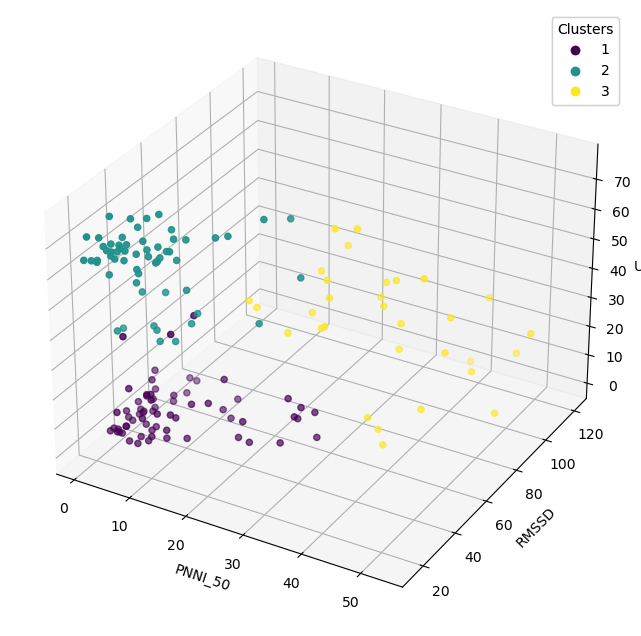

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data Anda
rmssd_values = X['rmssd']
pnni_50_values = X['pnni_50']
usia_values = X['usia']
cluster_labels = X['KMeans_Cluster']

# Membuat plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot dengan pewarnaan berdasarkan cluster
scatter = ax.scatter(pnni_50_values, rmssd_values, usia_values, c=cluster_labels, cmap='viridis')

# Menambahkan label sumbu
ax.set_xlabel('PNNI_50')
ax.set_ylabel('RMSSD')
ax.set_zlabel('Usia')

# Menambahkan legenda
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Menampilkan plot
plt.show()

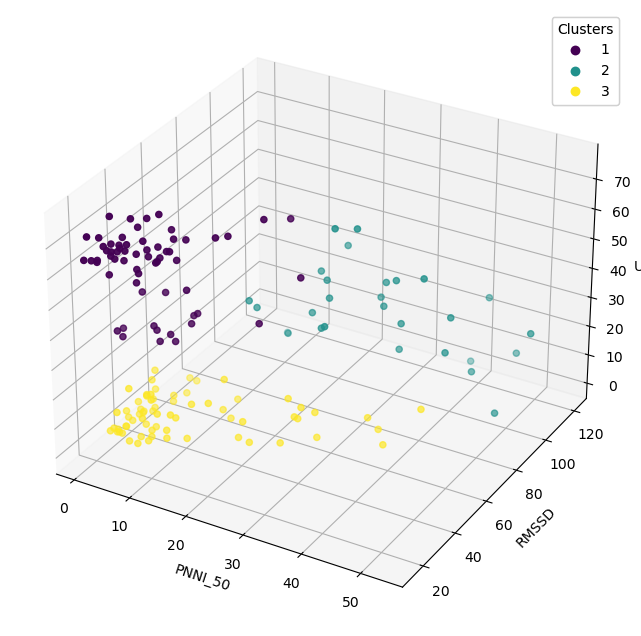

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data Anda
rmssd_values = X['rmssd']
pnni_50_values = X['pnni_50']
usia_values = X['usia']
cluster_labels = X['GMM_Clusters_KMeans']

# Membuat plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot dengan pewarnaan berdasarkan cluster
scatter = ax.scatter(pnni_50_values, rmssd_values, usia_values, c=cluster_labels, cmap='viridis')

# Menambahkan label sumbu
ax.set_xlabel('PNNI_50')
ax.set_ylabel('RMSSD')
ax.set_zlabel('Usia')

# Menambahkan legenda
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Menampilkan plot
plt.show()

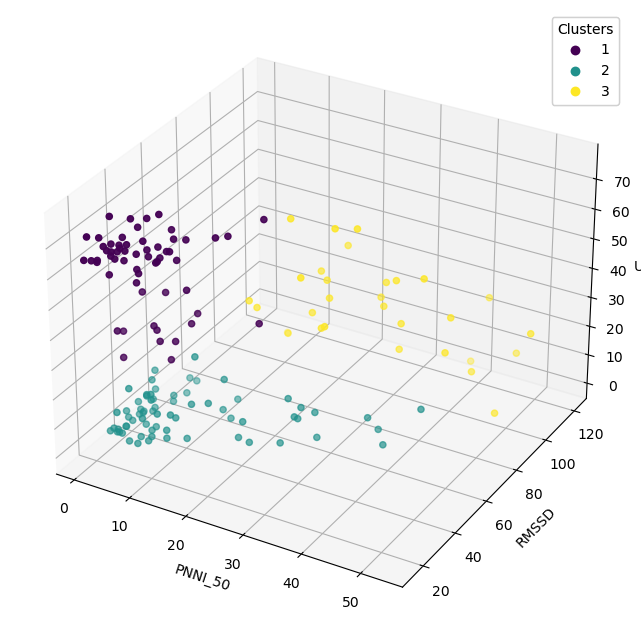

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data Anda
rmssd_values = X['rmssd']
pnni_50_values = X['pnni_50']
usia_values = X['usia']
cluster_labels = X['Hierarchical_Clusters']

# Membuat plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot dengan pewarnaan berdasarkan cluster
scatter = ax.scatter(pnni_50_values, rmssd_values, usia_values, c=cluster_labels, cmap='viridis')

# Menambahkan label sumbu
ax.set_xlabel('PNNI_50')
ax.set_ylabel('RMSSD')
ax.set_zlabel('Usia')

# Menambahkan legenda
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Menampilkan plot
plt.show()

In [187]:
import pandas as pd
X = pd.read_excel('hasil_all.xlsx')
X.head()

,Unnamed: 0,rmssd,pnni_50,usia,GMM_Clusters_KMeans,file,Hierarchical_Clusters,KMeans_Cluster,GMM_Clusters_Random
0,0,15.177757,0.789517,65.0,1,nsr011,1,2,3
1,1,16.621134,0.949012,72.0,1,nsr026,1,2,3
2,2,17.614672,1.282040,64.0,1,nsr006,1,2,3
3,3,19.228316,1.737907,63.0,1,nsr013,1,2,3
4,4,20.249970,1.458022,63.0,1,nsr029,1,2,3


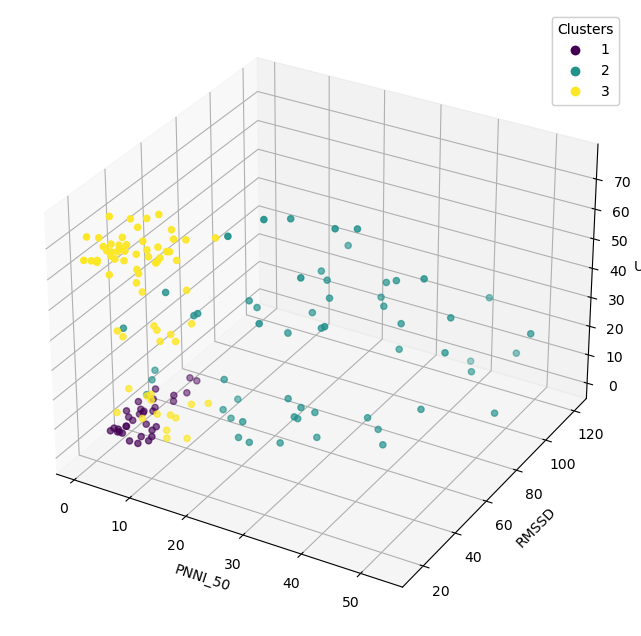

In [188]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data Anda
rmssd_values = X['rmssd']
pnni_50_values = X['pnni_50']
usia_values = X['usia']
cluster_labels = X['GMM_Clusters_Random']

# Membuat plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot dengan pewarnaan berdasarkan cluster
scatter = ax.scatter(pnni_50_values, rmssd_values, usia_values, c=cluster_labels, cmap='viridis')

# Menambahkan label sumbu
ax.set_xlabel('PNNI_50')
ax.set_ylabel('RMSSD')
ax.set_zlabel('Usia')

# Menambahkan legenda
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Menampilkan plot
plt.show()

# Plot Model GMM

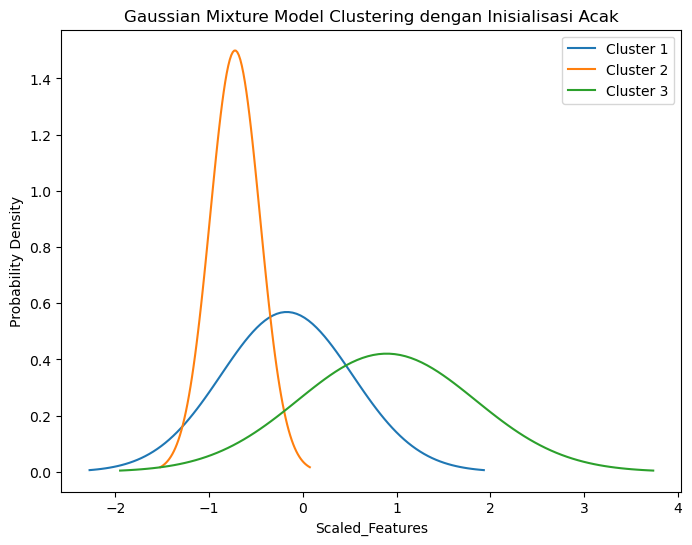

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Fungsi untuk menggambar lonceng (bell curve)
def plot_bell_curve(mu, sigma, label, color):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2)), label=label, color=color)

# Fungsi untuk memvisualisasikan GMM tanpa menampilkan data
def visualize_gmm(gmm, num_components):
    plt.figure(figsize=(8, 6))

    # Visualisasikan distribusi setiap komponen GMM
    for i in range(num_components):
        mean = gmm.means_[i]
        cov_matrix = np.diag(gmm.covariances_[i])
        sigma = np.sqrt(cov_matrix)

        plot_bell_curve(mean[0], sigma[0], f'Cluster {i+1}', color=f'C{i}')

    plt.title('Gaussian Mixture Model Clustering dengan Inisialisasi Acak')
    plt.xlabel('Scaled_Features')  # Label sumbu x
    plt.ylabel('Probability Density')  # Label sumbu y
    plt.legend()
    plt.show()

# Contoh penggunaan GMM clustering pada DataFrame "X1"
# Anda dapat mengganti nama kolom sesuai dengan data Anda
features = ["rmssd", "pnni_50", "usia"]
data = X1[features].values

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Inisialisasi dan latih model GMM
num_clusters = 3  # Ganti sesuai kebutuhan
gmm = GaussianMixture(n_components=num_clusters, covariance_type='full', init_params='random_from_data', random_state=42)
gmm.fit(data_scaled)

# Visualisasikan GMM clustering tanpa menampilkan data
visualize_gmm(gmm, num_clusters)

C:\Users\BALITTANAH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


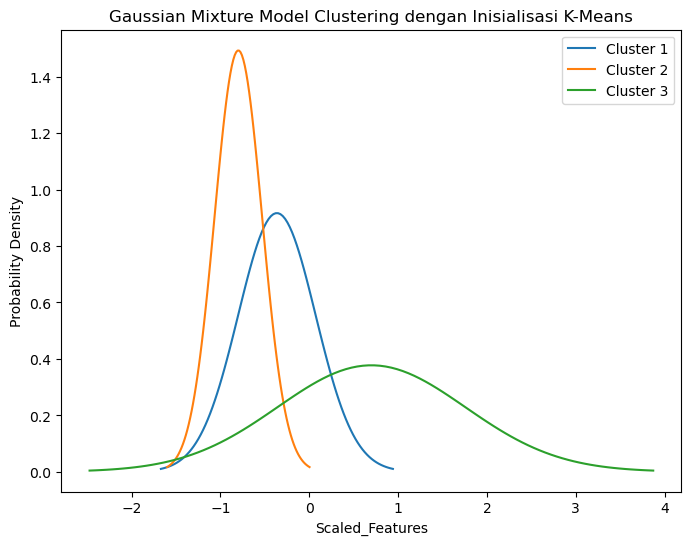

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Fungsi untuk menggambar lonceng (bell curve)
def plot_bell_curve(mu, sigma, label, color):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2)), label=label, color=color)

# Fungsi untuk memvisualisasikan GMM tanpa menampilkan data
def visualize_gmm(gmm, num_components):
    plt.figure(figsize=(8, 6))

    # Visualisasikan distribusi setiap komponen GMM
    for i in range(num_components):
        mean = gmm.means_[i]
        cov_matrix = np.diag(gmm.covariances_[i])
        sigma = np.sqrt(cov_matrix)

        plot_bell_curve(mean[0], sigma[0], f'Cluster {i+1}', color=f'C{i}')

    plt.title('Gaussian Mixture Model Clustering dengan Inisialisasi K-Means')
    plt.xlabel('Scaled_Features')  # Label sumbu x
    plt.ylabel('Probability Density')  # Label sumbu y
    plt.legend()
    plt.show()

# Contoh penggunaan GMM clustering pada DataFrame "X1"
# Anda dapat mengganti nama kolom sesuai dengan data Anda
features = ["rmssd", "pnni_50", "usia"]
data = X1[features].values

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Inisialisasi dan latih model GMM
num_clusters = 3  # Ganti sesuai kebutuhan
gmm = GaussianMixture(n_components=num_clusters, covariance_type='full', init_params='kmeans', random_state=42)
gmm.fit(data_scaled)

# Visualisasikan GMM clustering tanpa menampilkan data
visualize_gmm(gmm, num_clusters)

In [52]:
data_scaled

array([[-1.34090561, -0.93496805,  1.28322902],
       [-1.27760321, -0.92231628,  1.54452519],
       [-1.23402949, -0.89589926,  1.245901  ],
       [-1.1632597 , -0.85973821,  1.20857297],
       [-1.1184529 , -0.88193972,  1.20857297],
       [-1.08004585, -0.87254415,  1.46986914],
       [-1.04369108, -0.78975757,  1.32055704],
       [-1.04319196, -0.72716909,  1.32055704],
       [-1.04113864, -0.83756634,  1.35788507],
       [-1.02438169, -0.7772953 ,  1.02193285],
       [-1.0217394 , -0.74177048, -0.69515624],
       [-1.00056804, -0.76027626,  1.245901  ],
       [-0.97424933, -0.72175128,  1.20857297],
       [-0.95766649, -0.73166048,  0.3127004 ],
       [-0.94217922, -0.79692256,  1.69383728],
       [-0.93500486, -0.79225946,  1.35788507],
       [-0.93010468, -0.71029096,  1.28322902],
       [-0.90073334, -0.68719154,  1.32055704],
       [-0.8820997 , -0.64819912,  1.17124495],
       [-0.86495218, -0.64159932,  1.28322902],
       [-0.85233693, -0.71902813, -0.060

# Melihat outlier dikelompokkan dalam cluster mana dari masing2 metode

In [5]:
import pandas as pd

X1 = pd.read_excel('hasil_all.xlsx')

# Daftar file pasien yang ingin dicari
files_to_search = [16273, '4001', '424', 16773, '402','409']

# Mencari baris dengan file_pasien di antara daftar yang diberikan
result = X1[X1['file'].isin(files_to_search)]

# Menampilkan hasil
result

,Unnamed: 0,rmssd,pnni_50,usia,GMM_Clusters_KMeans,file,Hierarchical_Clusters,KMeans_Cluster,GMM_Clusters_Random
149,149,89.152499,50.669783,5.83,2,409,3,3,2
153,153,102.469895,53.135276,28.00,2,16273,3,3,2
154,154,107.966084,8.190888,0.42,2,4001,3,3,2
155,155,116.678092,47.322612,11.00,2,424,3,3,2
156,156,119.210450,41.685195,26.00,2,16773,3,3,2
157,157,120.984531,38.233447,0.83,2,402,3,3,2


In [6]:
# Grouping data berdasarkan kolom "Cluster" dan menghitung statistik
cluster_statsz = X1.groupby('KMeans_Cluster')[['pnni_50', 'rmssd', 'usia']].agg(
    {
        'rmssd': ['min', 'max', 'mean', 'var'],
        'pnni_50': ['min', 'max', 'mean', 'var'],
        'usia': ['min', 'max', 'mean', 'var']
    }
)

# Menampilkan hasil statistik
cluster_statsz

rmssd                                      pnni_50  \
                      min         max       mean         var       min   
KMeans_Cluster                                                           
1               22.455164   66.870694  40.390180  119.950549  0.587804   
2               15.177757   68.157090  31.295355   97.509481  0.789517   
3               58.952434  120.984531  83.633542  270.794713  8.190888   

                                                    usia                   \
                      max       mean         var     min   max       mean   
KMeans_Cluster                                                              
1               28.141352   7.841224   60.394269   0.083  38.0   6.168000   
2               25.514547   7.176326   28.734419  35.000  76.0  60.203390   
3               53.135276  32.446346  116.154690   0.083  65.0  28.239469   

                            
                       var  
KMeans_Cluster              
1                70.156695  
2               125.509643  
3               312.520905

In [7]:
# Grouping data berdasarkan kolom "Cluster" dan menghitung statistik
cluster_statsz = X1.groupby('GMM_Clusters_KMeans')[['pnni_50', 'rmssd', 'usia']].agg(
    {
        'rmssd': ['min', 'max', 'mean', 'var'],
        'pnni_50': ['min', 'max', 'mean', 'var'],
        'usia': ['min', 'max', 'mean', 'var']
    }
)

# Menampilkan hasil statistik
cluster_statsz

rmssd                                      pnni_50  \
                           min         max       mean         var       min   
GMM_Clusters_KMeans                                                           
1                    15.177757   68.157090  31.463272   96.144106  0.789517   
2                    58.952434  120.984531  85.747788  271.965278  8.190888   
3                    22.455164   73.507994  42.311477  159.438862  0.587804   

                                                         usia        \
                           max       mean         var     min   max   
GMM_Clusters_KMeans                                                   
1                    25.514547   7.212323   27.827255  35.000  76.0   
2                    53.135276  31.731995  127.865890   0.420  65.0   
3                    41.997488   9.579241  108.826560   0.083  17.0   

                                            
                          mean         var  
GMM_Clusters_KMeans                         
1                    59.080645  144.567160  
2                    31.681429  258.033057  
3                     4.688809   25.546069

In [8]:
# Grouping data berdasarkan kolom "Cluster" dan menghitung statistik
cluster_statsz = X1.groupby('Hierarchical_Clusters')[['pnni_50', 'rmssd', 'usia']].agg(
    {
        'rmssd': ['min', 'max', 'mean', 'var'],
        'pnni_50': ['min', 'max', 'mean', 'var'],
        'usia': ['min', 'max', 'mean', 'var']
    }
)

# Menampilkan hasil statistik
cluster_statsz

rmssd                                      pnni_50  \
                             min         max       mean         var       min   
Hierarchical_Clusters                                                           
1                      15.177757   53.745129  30.175804   61.562636  0.789517   
2                      22.455164   73.507994  42.347722  157.184819  0.587804   
3                      57.380938  120.984531  84.215870  289.198970  8.190888   

                                                           usia        \
                             max       mean         var     min   max   
Hierarchical_Clusters                                                   
1                      21.108916   6.620686   19.850504  35.000  76.0   
2                      41.997488   9.590895  107.235541   0.083  38.0   
3                      53.135276  31.155202  124.274552   0.420  65.0   

                                              
                            mean         var  
Hierarchical_Clusters                         
1                      59.440678  143.009351  
2                       5.171580   41.252065  
3                      33.502667  290.758413

In [9]:
# Grouping data berdasarkan kolom "Cluster" dan menghitung statistik
cluster_statsz = X1.groupby('GMM_Clusters_Random')[['pnni_50', 'rmssd', 'usia']].agg(
    {
        'rmssd': ['min', 'max', 'mean', 'var'],
        'pnni_50': ['min', 'max', 'mean', 'var'],
        'usia': ['min', 'max', 'mean', 'var']
    }
)

# Menampilkan hasil statistik
cluster_statsz

rmssd                                      pnni_50  \
                           min         max       mean         var       min   
GMM_Clusters_Random                                                           
1                    26.322554   66.870694  38.985962  116.584460  0.587804   
2                    32.141732  120.984531  68.509436  462.677296  1.526198   
3                    15.177757   43.238796  29.384437   38.526821  0.789517   

                                                        usia         \
                           max       mean         var    min    max   
GMM_Clusters_Random                                                   
1                     6.580967   2.660844    3.348238  0.083   5.42   
2                    53.135276  25.391291  156.185787  0.083  71.00   
3                    14.983544   6.366352   11.323119  0.170  76.00   

                                            
                          mean         var  
GMM_Clusters_Random                         
1                     1.550697    2.339712  
2                    25.350448  416.077663  
3                    49.961493  532.155183

# Waktu komputasi K-Means

In [182]:
import time
from sklearn.cluster import KMeans

# Tentukan jumlah kluster
num_clusters = 3

# Catat waktu awal
start_time = time.time()

# Inisialisasi objek KMeans
kmeans = KMeans(n_clusters=3, tol=0, random_state=42)
X1['KMeans_Cluster'] = kmeans.fit_predict(X)

# Catat waktu akhir setelah inisialisasi selesai
end_time = time.time()

# Hitung waktu komputasinya
computational_time = end_time - start_time

# Tampilkan waktu komputasi
print(f"Waktu komputasi: {computational_time} detik")

Waktu komputasi: 0.0007233619689941406 detik
